## End-Member Mixing Model Working Repository

In [1]:
from pathlib import Path
sys.path.append(str(Path().resolve().parent / 'Scripts'))
from packages import *
import colors

In [2]:
import read_mcw
df = read_mcw.read_and_process()
df.head()

,Sample Name,Site_ID,Collection_Date,D_2H,D_2H_StDev,D_18O,D_18O_StDev,Type,Site_no,D_18O_Rain,D_18O_Snow,D_18O_MC,D_18O_BC,D_2H_Rain,D_2H_Snow,D_18O_std_Rain,D_18O_std_Snow,D_18O_StDev_Precip,D_18O_Precip,D_2H_Precip
0,1,BC,2022-10-05,-126.803089,0.905,-16.459499,0.1660,BC,NaN,NaN,NaN,NaN,-16.459499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,MC,2022-10-05,-121.245698,0.503,-16.055768,0.0923,MC,NaN,NaN,NaN,-16.055768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,BC,2022-10-27,-124.454618,0.553,-16.515137,0.1370,BC,NaN,NaN,NaN,NaN,-16.515137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,MC,2022-10-27,-120.942857,0.834,-15.892233,0.2420,MC,NaN,NaN,NaN,-15.892233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,RC_01,2022-10-27,-92.796701,1.390,-12.540525,0.2320,RC,1.0,-12.540525,NaN,NaN,NaN,-92.796701,NaN,0.232,NaN,0.232,-12.540525,-92.796701


## Rain v Snow
#### Interval Board (IB) vs Rain Collector (RC)

In [3]:
#Rain Stats
print('Rain avg: ',df['D_18O_Rain'].mean())
std_mean_Rain = df['D_18O_std_Rain'].mean()
print('Std avg Rain: ', std_mean_Rain)
print('Rain std: ',df['D_18O_Rain'].std())
print('Rain Samples: ',df['D_18O_Rain'].count())
print('')
#Snow Stats
print('Snow avg: ', df['D_18O_Snow'].mean())
std_mean_Snow = df['D_18O_std_Snow'].mean()
print('Std avg Snow: ', std_mean_Snow)
print('Snow std: ', df['D_18O_Snow'].std())
print('Snow Samples: ',df['D_18O_Snow'].count())

Rain avg:  -11.92301123076923
Std avg Rain:  0.20272051282051282
Rain std:  2.866542527437503
Rain Samples:  78

Snow avg:  -19.115825106666666
Std avg Snow:  0.16103466666666666
Snow std:  2.254428092161091
Snow Samples:  75


# End-Member Mixing Equations

In [4]:
# Isotopic Signatures: δA, δB, and δM 
# Without Volume Weights 
delta_rain = df['D_18O_Rain'].mean()
delta_snow = df['D_18O_Snow'].mean()

delta_stream = df['D_18O']
delta_BC = df['D_18O_BC']
delta_MC = df['D_18O_MC']

#Overall without seperation of MC and BC
#df['fM_Rain'] = (delta_stream - delta_snow) / (delta_rain - delta_snow)
#df['fM_Snow'] = 1 - df.fM_Rain

#Seperate BC
df['fM_Rain_BC'] = (delta_BC - delta_snow) / (delta_rain - delta_snow)
df['fM_Snow_BC'] = 1 - df.fM_Rain_BC

#Seperate MC
df['fM_Rain_MC'] = (delta_MC - delta_snow) / (delta_rain - delta_snow)
df['fM_Snow_MC'] = 1 - df.fM_Rain_MC

snow_mean = df['fM_Snow_MC'].mean()
rain_mean = df['fM_Rain_MC'].mean()
print('Rain', rain_mean )
print('snow', snow_mean )

Rain 0.3683141969715054
snow 0.6316858030284945


### Base Rain vs Snow SE

In [5]:
#MC0
# Define standard errors
SE_rain = 0.202
SE_snow = 0.159

# Calculate the mixture concentration C_m
df['C_m'] = df['fM_Rain_MC'] * delta_rain + df['fM_Snow_MC'] * delta_snow

# Calculate the propagated standard error for the mixture concentration
df['sigma_C_m'] = np.sqrt((df['fM_Rain_MC'] * SE_rain) ** 2 + (df['fM_Snow_MC'] * SE_snow) ** 2)

#print(df[['Collection_Date', 'fM_Rain_MC', 'fM_Snow_MC', 'C_m', 'sigma_C_m']])
#df['sigma_C_m'].describe()

In [6]:
# Calculate the propagated standard error for the mixture concentration
df['sigma_BC0'] = np.sqrt((df['fM_Rain_BC'] * SE_rain) ** 2 + (df['fM_Snow_BC'] * SE_snow) ** 2)
df['sigma_BC0'].describe()

count    23.000000
mean      0.126373
std       0.002026
min       0.124946
25%       0.125062
50%       0.125286
75%       0.126827
max       0.131713
Name: sigma_BC0, dtype: float64

## End-Member Mixing Alternative Methods Resluts
### Base Method: Rain and Snow for MC & BC  
MC0_Rain; MC0_Snow; BC0_Rain; BC0_Snow

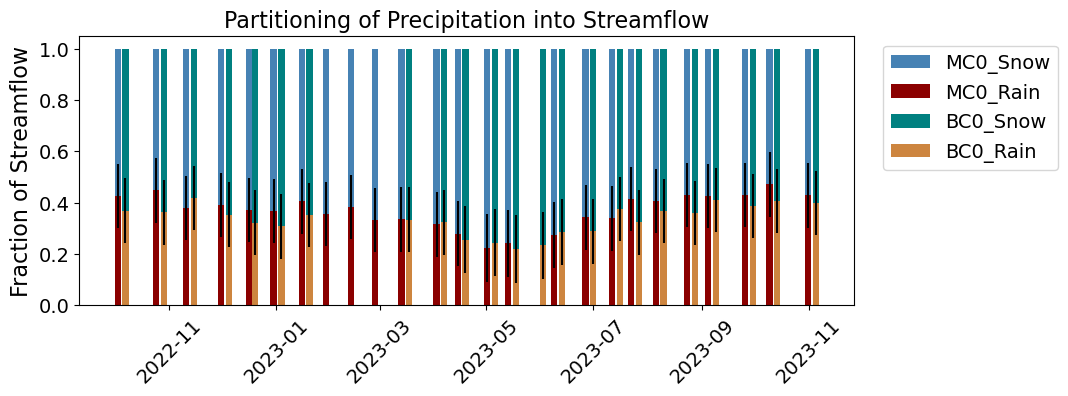

In [7]:
plt.rcParams["figure.figsize"] = [10.00, 3.50]
labels = df['Collection_Date']
width = 3.5

fig, ax = plt.subplots()
x = df['Collection_Date']
x = date2num(x)

rects3 = ax.bar(x-2.5, df.fM_Snow_MC+df.fM_Rain_MC, width, label='MC0_Snow', color=colors.snow)
rects1 = ax.bar(x-2.5, df.fM_Rain_MC, width, label='MC0_Rain', color= colors.rain, yerr=df.sigma_C_m, ecolor='black')

rects4 = ax.bar(x+2, df.fM_Snow_BC+df.fM_Rain_BC, width, label='BC0_Snow', color= colors.BC_snow)
rects2 = ax.bar(x+2, df.fM_Rain_BC, width, label='BC0_Rain',color= colors.BC_rain, yerr=df.sigma_BC0,ecolor='black')

ax.set_ylabel('Fraction of Streamflow', fontsize=16)
ax.set_title("Partitioning of Precipitation into Streamflow",fontsize=16)
plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize=14) 
plt.tick_params(axis='y', labelsize=14)
ax.legend(loc='upper center', bbox_to_anchor=(1.15, 1),fontsize=14)
ax.xaxis_date()

## Alt Method 1 (MC1)
### Snotel 7 days - Cold vs Warm

In [8]:
# New column for precip w/out stream samples
df['D_18O_Precip'] = np.where((df['Type'] == 'RC')|
                               (df['Type'] == 'IB'), df['D_18O'], np.nan)
print('Total Precip count: ',df['D_18O_Precip'].count())

Total Precip count:  153


In [9]:
# Cold v warm 7+
df['Cold7'] = np.where((df['Collection_Date'] >= '2022-11-03') &
                        (df['Collection_Date'] < '2023-04-22'), df['D_18O_Precip'], np.nan) 
df['Warm7'] = np.where((df['Collection_Date']  < '2022-11-03') |
                        (df['Collection_Date']  >= '2023-04-22'),df['D_18O_Precip'], np.nan)

print('cold7 count:',df['Cold7'].count())
print('warm7 count:',df['Warm7'].count())

cold7 count: 84
warm7 count: 69


In [10]:
# Isotopic Signatures: δA, δB, and δM 
#without Volume Weights 
delta_Cold7 = df['Cold7'].mean()
delta_Warm7 = df['Warm7'].mean()

print('Warm Avg: ',delta_Warm7)
print('Warm std:',df['Warm7'].std())

print('Cold Avg: ',delta_Cold7)
print('Cold std:',df['Cold7'].std())

#Equation 3 
# Calculate mean
mean_1 = delta_Cold7
mean_2 = delta_Warm7

# Calculate variance using n-1 in the denominator for an unbiased estimate
variance_1 = np.sum((df['Cold7'] - mean_1)**2) / (len(df['Cold7']) - 1)

# Calculate standard error of the mean
AM1_c_SE = np.sqrt(variance_1 / len(df['Cold7']))

print("Variance:", variance_1)
print("AM1 SE of the Mean Cold:", AM1_c_SE)

# Calculate variance using n-1 in the denominator for an unbiased estimate
variance_2 = np.sum((df['Warm7'] - mean_2)**2) / (len(df['Warm7']) - 1)

# Calculate standard error of the mean
AM1_w_SE = np.sqrt(variance_2 / len(df['Warm7']))

print("Variance:", variance_2)
print("AM1 SE of the Mean Warm:", AM1_w_SE)

Warm Avg:  -11.45475192753623
Warm std: 2.6922848691320254
Cold Avg:  -18.72980804761905
Cold std: 2.4275252119201998
Variance: 2.445544641620909
AM1 SE of the Mean Cold: 0.11030362081220693
Variance: 2.464455257629463
AM1 SE of the Mean Warm: 0.11072927088621307


In [11]:
# Seperate MC
df['fM_Warm7_MC'] = (delta_MC - delta_Cold7) / (delta_Warm7 - delta_Cold7)
df['fM_Cold7_MC'] = 1 - df.fM_Warm7_MC

In [12]:
# SE Propagation
AM1_w_SE = 0.110729
AM1_c_SE = 0.11030
# Calculate the propagated standard error for the mixture concentration
df['AM1_sigma_C_m'] = np.sqrt((df['fM_Warm7_MC'] * AM1_w_SE) ** 2 + (df['fM_Cold7_MC'] * AM1_c_SE) ** 2)

## MC2 Snotel Moving Average 

In [13]:
# Cold v warm 7+_ 
df['Cold7_avg'] = np.where((df['Collection_Date'] >= '2022-10-29') &
                        (df['Collection_Date'] < '2023-05-01'), df['D_18O_Precip'], np.nan) 
df['Warm7_avg'] = np.where((df['Collection_Date']  < '2022-10-29') |
                        (df['Collection_Date']  >= '2023-05-01'),df['D_18O_Precip'], np.nan)

print('cold7 avg count: ',df['Cold7_avg'].count())
print('warm7 avg count: ',df['Warm7_avg'].count())
# Isotopic Signatures 
#without Volume Weights 
delta_Cold7_avg = df['Cold7_avg'].mean()
delta_Warm7_avg = df['Warm7_avg'].mean()
print('Warm Avg: ',delta_Warm7_avg)
print('Cold Avg: ',delta_Cold7_avg)

cold7 avg count:  84
warm7 avg count:  69
Warm Avg:  -11.45475192753623
Cold Avg:  -18.72980804761905


In [14]:
#Seperate MC
df['fM_avg_Warm7_MC'] = (delta_MC - delta_Cold7_avg) / (delta_Warm7_avg - delta_Cold7_avg)
df['fM_avg_Cold7_MC'] = 1 - df.fM_avg_Warm7_MC

In [15]:
#SE
# Calculate the propagated standard error for the mixture concentration
df['AM2_sigma_C_m'] = np.sqrt((df['fM_avg_Warm7_MC'] * AM1_w_SE) ** 2 + (df['fM_avg_Cold7_MC'] * AM1_c_SE) ** 2)
print(df.AM2_sigma_C_m)

0           NaN
1      0.080763
2           NaN
3      0.079948
4           NaN
         ...   
196         NaN
197         NaN
198         NaN
199         NaN
200    0.080642
Name: AM2_sigma_C_m, Length: 201, dtype: float64


Text(0.5, 1.0, 'Partitioning of Precipitation into Streamflow')

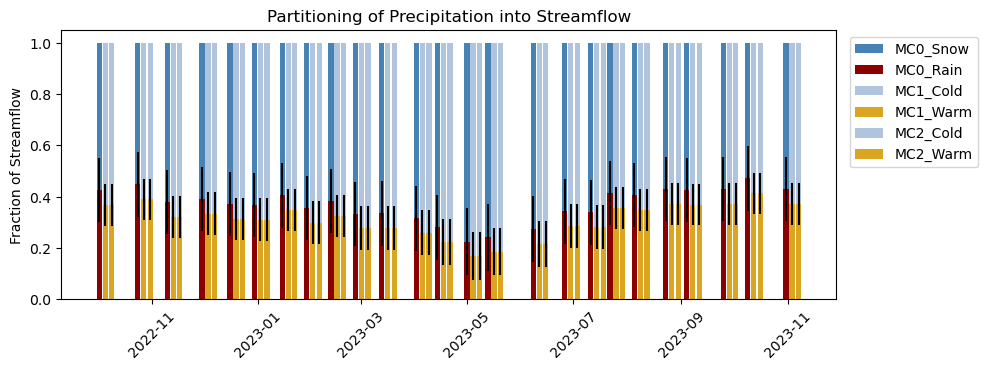

In [16]:
# MC1 and MC2 are the same
plt.rcParams["figure.figsize"] = [10.00, 3.50]
labels = df['Collection_Date']
#x = np.arange(len(labels))
width = 3

fig, ax = plt.subplots()
x = df['Collection_Date']
x = date2num(x)

# (+/-) to stagger bars 
rects1 = ax.bar(x - 3, df.fM_Snow_MC + df.fM_Rain_MC, width, label='MC0_Snow', color= colors.snow)
rects2 = ax.bar(x - 3, df.fM_Rain_MC, width, label='MC0_Rain', color= colors.rain,yerr=df.sigma_C_m, ecolor='black')

rects7 = ax.bar(x + 0.45, df.fM_Cold7_MC + df.fM_Warm7_MC, width, label='MC1_Cold', color= colors.cold)
rects5 = ax.bar(x + 0.45, df.fM_Warm7_MC, width, label='MC1_Warm', color= colors.warm, yerr=df.AM1_sigma_C_m, ecolor='black')

rects10 = ax.bar(x + 4.2, df.fM_avg_Cold7_MC + df.fM_avg_Warm7_MC, width, label='MC2_Cold', color= colors.cold)
rects11 = ax.bar(x + 4.2, df.fM_avg_Warm7_MC, width, label='MC2_Warm', color= colors.warm, yerr = df.AM2_sigma_C_m, ecolor='black')

ax.set_ylabel('Fraction of Streamflow')
plt.xticks(rotation=45)
ax.legend(loc='upper center', bbox_to_anchor=(1.1, 1))
ax.xaxis_date()  
ax.set_title("Partitioning of Precipitation into Streamflow")

## MC3 - Temperature for each site: Site 1 to 10 

In [17]:
''' WRF Data retrieved from wrf_analysis.ipynb '''
# Define the conditions
conditions = [
    (df['Collection_Date'] >= '12/13/2022') & (df['Collection_Date'] < '02/01/2023') & (df['Site_no'] == 1.0),
    (df['Collection_Date'] >= '12/02/2022') & (df['Collection_Date'] < '03/10/2023') & (df['Site_no'] == 2.0),
    (df['Collection_Date'] >= '12/02/2022') & (df['Collection_Date'] < '03/10/2023') & (df['Site_no'] == 3.0),
    (df['Collection_Date'] >= '11/10/2022') & (df['Collection_Date'] < '03/17/2023') & (df['Site_no'] == 4.0),
    (df['Collection_Date'] >= '11/16/2022') & (df['Collection_Date'] < '04/21/2023') & (df['Site_no'] == 5.0),
    (df['Collection_Date'] >= '11/16/2022') & (df['Collection_Date'] < '04/22/2023') & (df['Site_no'] == 6.0),
    (df['Collection_Date'] >= '11/16/2022') & (df['Collection_Date'] < '04/23/2023') & (df['Site_no'] == 7.0),
    (df['Collection_Date'] >= '11/16/2022') & (df['Collection_Date'] < '04/23/2023') & (df['Site_no'] == 8.0),
    (df['Collection_Date'] >= '11/02/2022') & (df['Collection_Date'] < '04/23/2023') & (df['Site_no'] == 9.0),
    (df['Collection_Date'] >= '11/02/2022') & (df['Collection_Date'] < '04/23/2023') & (df['Site_no'] == 10.0)
]

# Define the choices
choices = [df['D_18O_Precip'],df['D_18O_Precip'],df['D_18O_Precip'],
           df['D_18O_Precip'],df['D_18O_Precip'],df['D_18O_Precip']
           ,df['D_18O_Precip'],df['D_18O_Precip'],df['D_18O_Precip'],
           df['D_18O_Precip']]

# Create the new cold season column
df['wrf_Cold7'] = np.select(conditions, choices, default=np.nan)

# Create the new warm season column 'warm_wrf_7' for all other values
df['wrf_Warm7'] = df.loc[df['wrf_Cold7'].isna(), 'D_18O_Precip']

print('wrf cold7 count: ',df['wrf_Cold7'].count())
print('wrf warm7 count: ',df['wrf_Warm7'].count())#

wrf cold7 count:  73
wrf warm7 count:  80


In [18]:
# Isotopic Signatures: δA, δB, and δM 
#without Volume Weights 
delta_wrf_Cold7 = df['wrf_Cold7'].mean()
delta_wrf_Warm7 = df['wrf_Warm7'].mean()

print('Wrf Warm Avg: ',delta_wrf_Warm7)
print('Wrf Warm std: ',df['wrf_Warm7'].std())

print('Wrf Cold Avg: ',delta_wrf_Cold7)
print('Wrf Cold std:',df['wrf_Cold7'].std())

Wrf Warm Avg:  -12.285800674999999
Wrf Warm std:  3.407501493242849
Wrf Cold Avg:  -18.91531102739726
Wrf Cold std: 2.3336895225554617


In [19]:
#Seperate MC
df['fM__wrf_Warm7_MC'] = (delta_MC - delta_wrf_Cold7) / (delta_wrf_Warm7 - delta_wrf_Cold7)
df['fM__wrf_Cold7_MC'] = 1 - df.fM__wrf_Warm7_MC

In [20]:
#SE
#unweighted cold se 0.10569075917849562
#un weight warm se 0.16072768280867766
# Calculate the propagated standard error for the mixture concentration
df['AM3_sigma_C_m'] = np.sqrt((df['fM__wrf_Warm7_MC'] * 0.1607) ** 2 + (df['fM__wrf_Cold7_MC'] * 0.1056) ** 2)

## MC4 Moving average WRF 7 days each site

In [21]:
# Define the conditions
conditions = [
    (df['Collection_Date'] >= '12/6/2022') & (df['Collection_Date'] < '03/02/2023') & (df['Site_no'] == 1.0),
    (df['Collection_Date'] >= '11/12/2022') & (df['Collection_Date'] < '04/01/2023') & (df['Site_no'] == 2.0),
    (df['Collection_Date'] >= '12/03/2022') & (df['Collection_Date'] < '04/01/2023') & (df['Site_no'] == 3.0),
    (df['Collection_Date'] >= '11/11/2022') & (df['Collection_Date'] < '04/09/2023') & (df['Site_no'] == 4.0),
    (df['Collection_Date'] >= '11/08/2022') & (df['Collection_Date'] < '04/10/2023') & (df['Site_no'] == 5.0),
    (df['Collection_Date'] >= '11/07/2022') & (df['Collection_Date'] < '04/26/2023') & (df['Site_no'] == 6.0),
    (df['Collection_Date'] >= '11/07/2022') & (df['Collection_Date'] < '04/26/2023') & (df['Site_no'] == 7.0),
    (df['Collection_Date'] >= '11/07/2022') & (df['Collection_Date'] < '04/26/2023') & (df['Site_no'] == 8.0),
    (df['Collection_Date'] >= '10/28/2022') & (df['Collection_Date'] < '04/27/2023') & (df['Site_no'] == 9.0),
    (df['Collection_Date'] >= '10/27/2022') & (df['Collection_Date'] < '04/29/2023') & (df['Site_no'] == 10.0)
]

# Define the choices
choices = [df['D_18O_Precip'],df['D_18O_Precip'],df['D_18O_Precip'],
           df['D_18O_Precip'],df['D_18O_Precip'],df['D_18O_Precip']
           ,df['D_18O_Precip'],df['D_18O_Precip'],df['D_18O_Precip'],
           df['D_18O_Precip']]

# Create the new column
df['moving_Cold7'] = np.select(conditions, choices, default=np.nan)

# Create the new column 'warm_wrf_7' for all other values
df['moving_Warm7'] = df.loc[df['moving_Cold7'].isna(), 'D_18O_Precip']

print('moving cold7 count: ',df['moving_Cold7'].count())
print('moving warm7 count: ',df['moving_Warm7'].count())

moving cold7 count:  81
moving warm7 count:  72


In [22]:
# Isotopic Signatures: δA, δB, and δM 
#without Volume Weights 
delta_moving_Cold7 = df['moving_Cold7'].mean()
delta_moving_Warm7 = df['moving_Warm7'].mean()

print('Wrf Moving Warm Avg: ',delta_moving_Warm7)
print('Wrf Moving Warm std: ',df['moving_Warm7'].std())

print('Wrf Moving Cold Avg: ',delta_moving_Cold7)
print('Wrf Moving Cold std: ',df['moving_Cold7'].std())

Wrf Moving Warm Avg:  -11.637674458333334
Wrf Moving Warm std:  2.7927539347731836
Wrf Moving Cold Avg:  -18.8366567654321
Wrf Moving Cold std:  2.3920576102667983


In [23]:
#Seperate MC
df['fM__moving_Warm7_MC'] = (delta_MC - delta_moving_Cold7) / (delta_moving_Warm7 - delta_moving_Cold7)
df['fM__moving_Cold7_MC'] = 1 - df.fM__moving_Warm7_MC

In [24]:
#SE
#unweighted cold se 0.1103036208122069
#un weight warm se 0.11072927088621307
# Calculate the propagated standard error for the mixture concentration
df['AM4_sigma_C_m'] = np.sqrt((df['fM__moving_Warm7_MC'] * 0.1107) ** 2 + (df['fM__moving_Cold7_MC'] * 0.1103) ** 2)

## MC Combined 1/2-4 with Base MC0
Method 1 was the same as 2

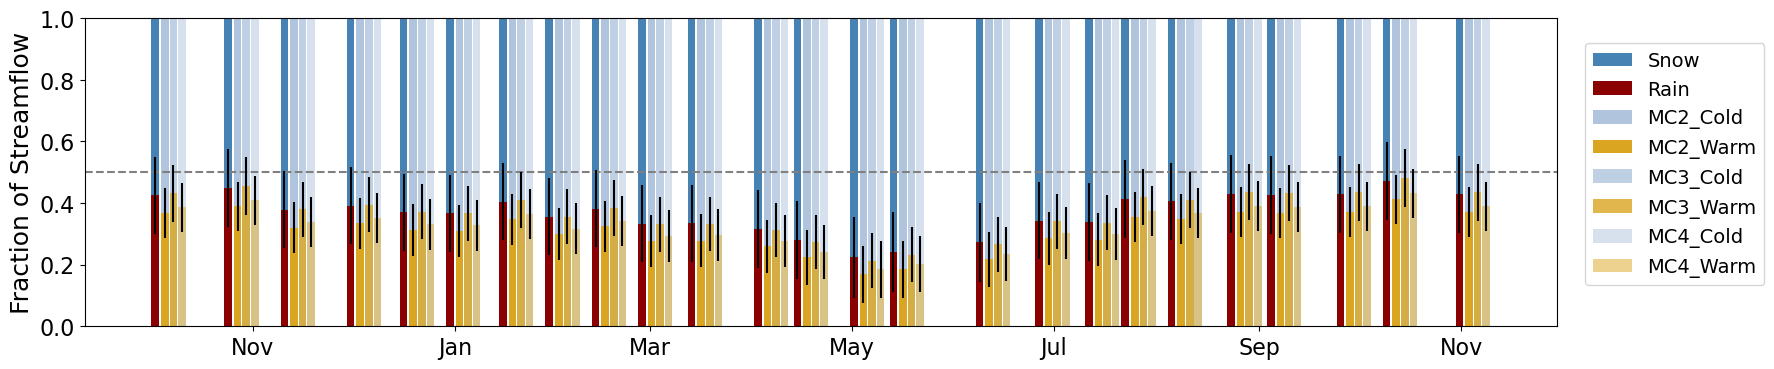

In [25]:
#combine MC1/2, MC3, MC4
plt.rcParams["figure.figsize"] = [19, 4]
labels = df['Collection_Date']
width = 2.3
fig, ax = plt.subplots()
x = df['Collection_Date']
x = date2num(x)

# Add a horizontal line at 50%
plt.axhline(0.5, color='gray', linestyle='--')

# (+/-) to stagger bars 
# Rain vs Snow
rects1 = ax.bar(x - 2.5, df.fM_Snow_MC + df.fM_Rain_MC, width, label='Snow', color= colors.snow)
rects2 = ax.bar(x - 2.5, df.fM_Rain_MC, width, label='Rain', color= colors.rain,yerr=df.sigma_C_m, ecolor='black')

#2 snowtel average 
rects5 = ax.bar(x + 0.4, df.fM_avg_Cold7_MC + df.fM_avg_Warm7_MC, width, label='MC2_Cold', color= colors.cold)
rects6 = ax.bar(x + 0.4, df.fM_avg_Warm7_MC, width, label='MC2_Warm', color= colors.warm,yerr = df.AM2_sigma_C_m, ecolor='black')

# WRF 7 in a row
rects7 = ax.bar(x + 3, df.fM__wrf_Cold7_MC + df.fM__wrf_Warm7_MC, width, label='MC3_Cold', color= colors.cold,alpha=.8)
rects5 = ax.bar(x + 3, df.fM__wrf_Warm7_MC, width, label='MC3_Warm', color= colors.warm,alpha=.8,yerr = df.AM3_sigma_C_m, ecolor='black')

#WRF Moving average all sites
rects7 = ax.bar(x + 5.6, df.fM__moving_Cold7_MC + df.fM__moving_Warm7_MC, width, label='MC4_Cold', color= colors.cold,alpha=0.5)
rects8 = ax.bar(x + 5.6, df.fM__moving_Warm7_MC, width, label='MC4_Warm', color= colors.warm, alpha=0.5,yerr = df.AM4_sigma_C_m, ecolor='black')

ax.set_ylabel('Fraction of Streamflow',fontsize=18)
plt.tick_params(axis='x', labelsize=16) 
plt.tick_params(axis='y', labelsize=16)
plt.ylim(0,1.0)
ax.legend(loc='upper center', bbox_to_anchor=(1.08, 0.95),fontsize=14)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
#ax.set_title("Mores Creek Partitioning of Precipitation into Streamflow", fontsize=20);

## AM5 MC Elevation Precip Weighted

In [26]:
delta_MCE_Snow = -19.53
delta_MCE_Rain = -12.80

df['fM__wghtd_MCE_Rain'] = (delta_MC - delta_MCE_Snow) / (delta_MCE_Rain - delta_MCE_Snow)
df['fM__wghtd_MCE_Snow'] = 1 - df.fM__wghtd_MCE_Rain

In [27]:
#SE
# Rain Standard Error: 0.454
# snow Standard Error: 0.376
# Calculate the propagated standard error for the mixture concentration
df['AM5_sigma_C_m'] = np.sqrt((df['fM__wghtd_MCE_Rain'] *0.454) ** 2 + (df['fM__wghtd_MCE_Snow'] * 0.376) ** 2)

### MC6 Sine Curve Fitting

In [28]:
'''Sine Curve Fitting found in: Isotope_Analysis.ipynb'''
# Summer Peak and Winter Trough Values
w1 = -19.15
s1= -7.60
w2= -19.16
s2= -8.07
w3= -19.79
s3= -8.05
w4= -19.76
s4= -8.52
w5= -20.57
s5= -9.23
w6= -19.61
s6= -9.85
w7= -20.79
s7= -9.47
w8= -19.10
s8= -11.72
w9= -19.18
s9= -12.33
w10= -19.63
s10=  -12.70

delta_Sine_peak = (s1 + s2 + s3 + s4 + s5 + s6 + s7 + s8 + s9 + s10) / 10
print ('Sine Summer: ',delta_Sine_peak)
delta_Sine_trough = (w1+ w2 + w3 + w4 + w5 + w6 + w7 + w8 + w9 + w10) / 10 
print('Sine Winter: ',delta_Sine_trough)

delta_Sine_trough = -19.67
delta_Sine_peak = -9.75

#Sine Mass Weight Warm 
#Sine Mass Weight cold 
delta_Sine_Cold_Mass = -19.50
delata_Sine_Warm_Mass = -10.43

d_Sine_Cold_AW = -19.85
d_Sine_Warm_AW = -8.95

#Seperate MC
df['fM__Sine_Warm_MC'] = (delta_MC - delta_Sine_trough) / (delta_Sine_peak - delta_Sine_trough)
df['fM__Sine_Cold_MC'] = 1 - df['fM__Sine_Warm_MC']

df['fM__Sine_Warm_MC_mass'] = (delta_MC - delta_Sine_Cold_Mass) / (delata_Sine_Warm_Mass - delta_Sine_Cold_Mass)
df['fM__Sine_Cold_MC_mass'] = 1 - df['fM__Sine_Warm_MC_mass']

df['fM__Sine_Warm_MC_aw'] = (delta_MC - d_Sine_Cold_AW) / (d_Sine_Warm_AW - d_Sine_Cold_AW)
df['fM__Sine_Cold_MC_aw'] = 1 - df['fM__Sine_Warm_MC_aw']

Sine Summer:  -9.754000000000001
Sine Winter:  -19.674


In [29]:
# Summer Peak and Winter Trough Values
summer_peaks = np.array([-7.60, -8.07, -8.05, -8.52, -9.23, -9.85, -9.47, -11.72, -12.33, -12.70])
winter_troughs = np.array([-19.15, -19.16, -19.79, -19.76, -20.57, -19.61, -20.79, -19.10, -19.18, -19.63])

# Calculate means
mean_summer_peak = np.mean(summer_peaks)
mean_winter_trough = np.mean(winter_troughs)

# Calculate standard deviations
std_summer_peak = np.std(summer_peaks, ddof=1)  # ddof=1 for sample standard deviation
std_winter_trough = np.std(winter_troughs, ddof=1)

# Calculate standard errors
n = len(summer_peaks)
se_summer_peak = std_summer_peak / np.sqrt(n)
se_winter_trough = std_winter_trough / np.sqrt(n)

print('Sine Summer Mean: ', mean_summer_peak)
print('Sine Winter Mean: ', mean_winter_trough)
print('Standard Error for Summer Peak: ', se_summer_peak)
print('Standard Error for Winter Trough: ', se_winter_trough)

Sine Summer Mean:  -9.754
Sine Winter Mean:  -19.674
Standard Error for Summer Peak:  0.5911029239199097
Standard Error for Winter Trough:  0.18819139193916384


In [30]:
# AM6  SE Calculation
#residual SE this is raw 
#SE_Peak = 0.75646
#SE_Trough =  0.7143

df['AM6_sigma_C_m'] = np.sqrt((df['fM__Sine_Warm_MC'] *.756) ** 2 + (df['fM__Sine_Cold_MC'] * 0.714) ** 2)
#print(df.AM6_sigma_C_m)

df['AM7_sigma_C_m'] = np.sqrt((df['fM__Sine_Warm_MC_mass'] *0.69) ** 2 + (df['fM__Sine_Cold_MC_mass'] * 0.2097) ** 2)
#Warm SE Weighted Mean: 0.691458
# cold precip SE= 0.2097 

df['AM8_sigma_C_m'] = np.sqrt((df['fM__Sine_Warm_MC_aw'] *0.487) ** 2 + (df['fM__Sine_Cold_MC_aw'] * 0.222) ** 2)
#print(df.AM6_sigma_C_m)
#warm SE Weighted Mean: 0.486615
#cold precip SE=  0.2223  

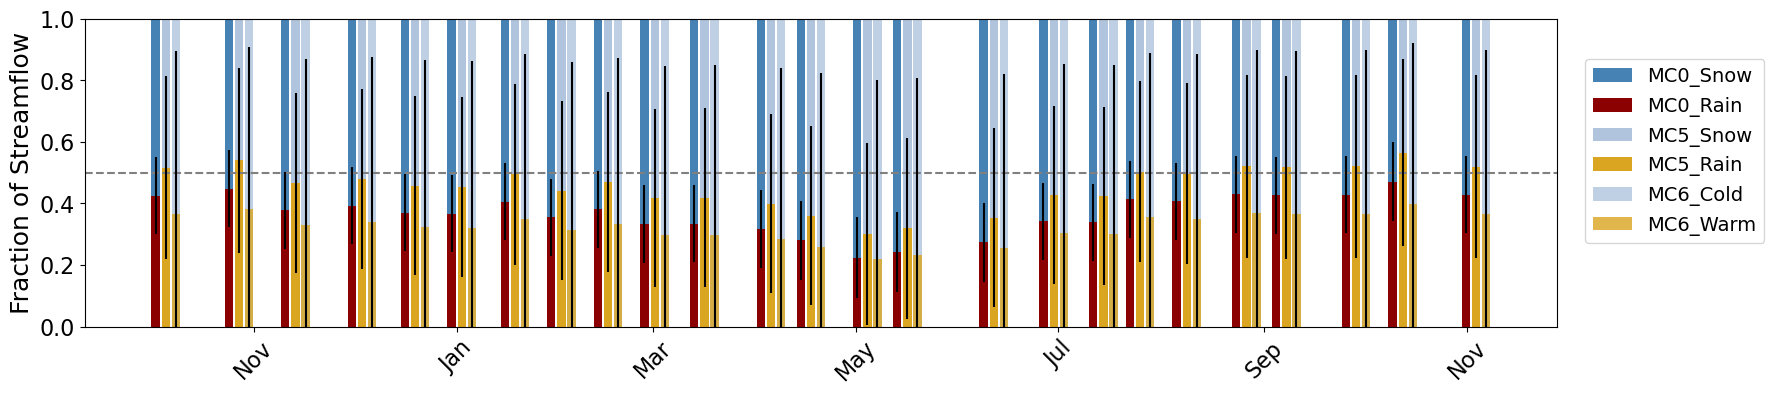

In [31]:
# MC5 - MC6 Combined
plt.rcParams["figure.figsize"] = [19, 4]
labels = df['Collection_Date']
width = 2.5

fig, ax = plt.subplots()
x = df['Collection_Date']
x = date2num(x)
# Add a horizontal line at 50%
plt.axhline(0.5, color='gray', linestyle='--')
# (+/-) to stagger bars 
# Rain vs Snow
rects1 = ax.bar(x - 2.5, df.fM_Snow_MC + df.fM_Rain_MC, width, label='MC0_Snow', color= colors.snow)
rects2 = ax.bar(x - 2.5, df.fM_Rain_MC, width, label='MC0_Rain', color= colors.rain,yerr=df.sigma_C_m, ecolor='black')

#Elevation Mass Weighted 
rects9 = ax.bar(x + 0.6, df.fM__wghtd_MCE_Snow + df.fM__wghtd_MCE_Rain, width, label='MC5_Snow', color= colors.cold)
rects10 = ax.bar(x + 0.6, df.fM__wghtd_MCE_Rain, width, label='MC5_Rain', color= colors.warm,yerr=df.AM5_sigma_C_m, ecolor='black')

#Sine trough and Peak
rects7 = ax.bar(x + 3.6, df['fM__Sine_Warm_MC'] + df['fM__Sine_Cold_MC'], width, label='MC6_Cold', color= colors.cold, alpha=0.8)
rects8 = ax.bar(x + 3.6, df['fM__Sine_Warm_MC'], width, label='MC6_Warm', color= colors.warm,alpha=0.8,yerr = df.AM6_sigma_C_m, ecolor='black')

ax.set_ylabel('Fraction of Streamflow', fontsize=18)
plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize=16) 
plt.tick_params(axis='y', labelsize=16)
plt.ylim(0,1.0)
ax.legend(loc='upper center', bbox_to_anchor=(1.08, 0.9),fontsize=14)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'));

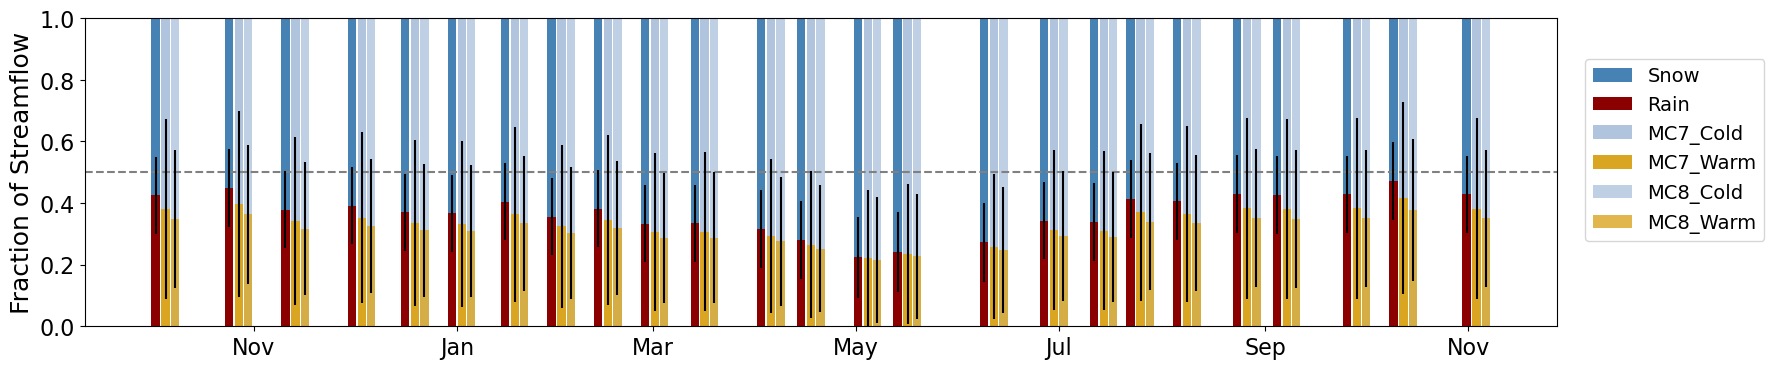

In [32]:
# MC7 - MC8 Combined
plt.rcParams["figure.figsize"] = [19, 4]
labels = df['Collection_Date']
width = 2.5

fig, ax = plt.subplots()
x = df['Collection_Date']
x = date2num(x)
# Add a horizontal line at 50%
plt.axhline(0.5, color='gray', linestyle='--')
# (+/-) to stagger bars 
# Rain vs Snow
rects1 = ax.bar(x - 2.5, df.fM_Snow_MC + df.fM_Rain_MC, width, label='Snow', color= colors.snow)
rects2 = ax.bar(x - 2.5, df.fM_Rain_MC, width, label='Rain', color= colors.rain,yerr=df.sigma_C_m, ecolor='black')

# Sine Mass Weighted
rects9 = ax.bar(x + 0.5, df['fM__Sine_Warm_MC_mass'] + df['fM__Sine_Cold_MC_mass'], width, label='MC7_Cold', color= colors.cold)
rects10 = ax.bar(x + 0.5, df['fM__Sine_Warm_MC_mass'], width, label='MC7_Warm', color= colors.warm,yerr = df.AM7_sigma_C_m, ecolor='black')

# Sine Mass & Area Weighted
rects11 = ax.bar(x + 3.3, df['fM__Sine_Warm_MC_aw'] + df['fM__Sine_Cold_MC_aw'], width, label='MC8_Cold', color= colors.cold, alpha=0.8)
rects12 = ax.bar(x + 3.3, df['fM__Sine_Warm_MC_aw'], width, label='MC8_Warm', color= colors.warm, alpha=0.8,yerr = df.AM8_sigma_C_m, ecolor='black')

ax.set_ylabel('Fraction of Streamflow', fontsize=18)
plt.tick_params(axis='x', labelsize=16) 
plt.tick_params(axis='y', labelsize=16)
# set legend to side of plot
ax.legend(loc='upper center', bbox_to_anchor=(1.08, 0.9), fontsize=14)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.ylim(0,1.0);

# BC1 Alternative Method

In [33]:
# Town Creek Cold v warm 7+_ 
df['BC_Cold7_avg'] = np.where((df['Collection_Date'] >= '2022-11-09') &
                        (df['Collection_Date'] < '2023-04-08'), df['D_18O_Precip'], np.nan) 
df['BC_Warm7_avg'] = np.where((df['Collection_Date']  < '2022-11-09') |
                        (df['Collection_Date']  >= '2023-04-08'),df['D_18O_Precip'], np.nan)

print('BC cold7 avg count: ',df['BC_Cold7_avg'].count())
print('BC warm7 avg count: ',df['BC_Warm7_avg'].count())
# Isotopic Signatures 
#without Volume Weights 
delta_BC_Cold7_avg = df['BC_Cold7_avg'].mean()
delta_BC_Warm7_avg = df['BC_Warm7_avg'].mean()
print('BC Cold Avg: ',delta_BC_Cold7_avg)
print('BC Warm Avg: ',delta_BC_Warm7_avg)

BC cold7 avg count:  84
BC warm7 avg count:  69
BC Cold Avg:  -18.72980804761905
BC Warm Avg:  -11.45475192753623


In [34]:
# Precip cold SE
data_am1pc = df['BC_Cold7_avg']
# Calculate the mean
mean_am1pc = np.mean(data_am1pc)
# Calculate the variance using Bessel's correction (ddof=1)
var_am1pc = np.var(data_am1pc, ddof=1)
# Calculate the standard error of the mean
n_am1pc = len(data_am1pc)
#standard_error = np.sqrt(variance_y / n)
se_am1pc = np.sqrt(var_am1pc / n_am1pc)
print("Average pc:", mean_am1pc)
print("Variance pc:", var_am1pc)
print("SE of the Mean pc:", se_am1pc)
print('')
#BC1 Precip Warm
data_am1pw = df['BC_Warm7_avg']
# Calculate the mean
mean_am1pw = np.mean(data_am1pw)
# Calculate the variance using Bessel's correction (ddof=1)
var_am1_pw = np.var(data_am1pw, ddof=1)
# Calculate the standard error of the mean
n_am1pw = len(data_am1pw)
#standard_error = np.sqrt(variance_y / n)
se_am1pw = np.sqrt(var_am1_pw / n_am1pw)
print("Average pw:", mean_am1pw)
print("Variance pw:", var_am1_pw)
print("SE of the Mean pw:", se_am1pw)

Average pc: -18.72980804761905
Variance pc: 5.892878654508212
SE of the Mean pc: 0.17122442656141276

Average pw: -11.45475192753623
Variance pw: 7.248397816557247
SE of the Mean pw: 0.18989913290847144


In [35]:
#Seperate BC
df['fM_Warm7_BC'] = (delta_BC - delta_BC_Cold7_avg) / (delta_BC_Warm7_avg - delta_BC_Cold7_avg)
df['fM_Cold7_BC'] = 1 - df.fM_Warm7_BC

In [36]:
#BC SE
df['AM1_sigma_BC'] = np.sqrt((df['fM_Warm7_BC'] *se_am1pw) ** 2 + (df['fM_Cold7_BC'] * se_am1pc) ** 2)

### BC2 Site 4 ONLY
#### Cold vs Warm Moving Avg WRF

In [37]:
df['D_18O_Precip_4'] = np.where(df['Site_no'] == 4.0, df['D_18O_Precip'], np.nan)
print('BC4 count: ', df['D_18O_Precip_4'].count())

BC4 count:  17


In [38]:
# Cold v warm wrf moving average Basing the dates off of site 4!  
df['BC_Cold7_site4'] = np.where((df['Collection_Date'] >= '2022-11-10') &
                        (df['Collection_Date'] < '2023-03-17'), df['D_18O_Precip_4'], np.nan) 
df['BC_Warm7_Site4'] = np.where((df['Collection_Date']  < '2022-11-11') |
                        (df['Collection_Date']  >= '2023-03-17'),df['D_18O_Precip_4'], np.nan)

print('BC 4 cold7 count: ',df['BC_Cold7_site4'].count())
print('BC 4 warm7 count: ',df['BC_Warm7_Site4'].count())

# Isotopic Signatures: δA, δB, and δM 
#without Volume Weights 
delta_BC_Cold7_4 = df['BC_Cold7_site4'].mean()
delta_BC_Warm7_4 = df['BC_Warm7_Site4'].mean()
print('Warm Avg: ',delta_BC_Warm7_4)
print('Cold Avg: ',delta_BC_Cold7_4)

BC 4 cold7 count:  6
BC 4 warm7 count:  11
Warm Avg:  -12.66473309090909
Cold Avg:  -18.44507666666667


In [39]:
#Seperate BC
df['fM_Warm7_BC_4'] = (delta_BC - delta_BC_Cold7_4) / (delta_BC_Warm7_4 - delta_BC_Cold7_4)
df['fM_Cold7_BC_4'] = 1 - df.fM_Warm7_BC_4

In [40]:
# Precip cold SE
data_am1pc = df['BC_Cold7_site4']
# Calculate the mean
mean_am1pc = np.mean(data_am1pc)
# Calculate the variance using Bessel's correction (ddof=1)
var_am1pc = np.var(data_am1pc, ddof=1)
# Calculate the standard error of the mean
n_am1pc = len(data_am1pc)
#standard_error = np.sqrt(variance_y / n)
se_am1pc = np.sqrt(var_am1pc / n_am1pc)
print("Mean pc:", mean_am1pc)
print("Variance pc:", var_am1pc)
print("SE of the Mean pc:", se_am1pc)
print('')
#BC2 Precip Warm
data_am1pw = df['BC_Warm7_Site4']
# Calculate the mean
mean_am1pw = np.mean(data_am1pw)
# Calculate the variance using Bessel's correction (ddof=1)
var_am1_pw = np.var(data_am1pw, ddof=1)
# Calculate the standard error of the mean
n_am1pw = len(data_am1pw)
#standard_error = np.sqrt(variance_y / n)
se_am1pw = np.sqrt(var_am1_pw / n_am1pw)
print("Mean pw:", mean_am1pw)
print("Variance pw:", var_am1_pw)
print("SE of the Mean pw:", se_am1pw)

Mean pc: -18.44507666666667
Variance pc: 12.636229721073072
SE of the Mean pc: 0.25073255578943443

Mean pw: -12.66473309090909
Variance pw: 16.810808388968887
SE of the Mean pw: 0.2891986559991004


In [41]:
# Calculate the propagated standard error for the mixture concentration
df['BC1_sigma_C_m'] = np.sqrt((df['fM_Warm7_BC_4'] * se_am1pw) ** 2 + (df['fM_Cold7_BC_4'] * se_am1pc) ** 2)
#print(df.BC1_sigma_C_m)

### BC3 Moving Avgerage WRF of only sites 2-8

In [42]:
# BC site 2-8 wrf moving avg 
conditions = [
    (df['Collection_Date'] >= '11/12/2022') & (df['Collection_Date'] < '04/01/2023') & (df['Site_no'] == 2.0),
    (df['Collection_Date'] >= '12/03/2022') & (df['Collection_Date'] < '04/01/2023') & (df['Site_no'] == 3.0),
    (df['Collection_Date'] >= '11/11/2022') & (df['Collection_Date'] < '04/09/2023') & (df['Site_no'] == 4.0),
    (df['Collection_Date'] >= '11/08/2022') & (df['Collection_Date'] < '04/10/2023') & (df['Site_no'] == 5.0),
    (df['Collection_Date'] >= '11/07/2022') & (df['Collection_Date'] < '04/26/2023') & (df['Site_no'] == 6.0),
    (df['Collection_Date'] >= '11/07/2022') & (df['Collection_Date'] < '04/26/2023') & (df['Site_no'] == 7.0),
    (df['Collection_Date'] >= '11/07/2022') & (df['Collection_Date'] < '04/26/2023') & (df['Site_no'] == 8.0)
]

# Define the choices
choices = [df['D_18O_Precip'],df['D_18O_Precip'],df['D_18O_Precip'],
           df['D_18O_Precip'],df['D_18O_Precip'],df['D_18O_Precip']
           ,df['D_18O_Precip']]

# Create the new column
df['BC_moving_Cold7'] = np.select(conditions, choices, default=np.nan)

# Create the new column 'warm_wrf_7' for all other values
conditions2 = [
    (df['Collection_Date'] < '11/12/2022') | (df['Collection_Date'] >= '04/01/2023') & (df['Site_no'] == 2.0),
    (df['Collection_Date'] < '12/03/2022') | (df['Collection_Date'] >= '04/01/2023') & (df['Site_no'] == 3.0),
    (df['Collection_Date'] < '11/11/2022') | (df['Collection_Date'] >= '04/09/2023') & (df['Site_no'] == 4.0),
    (df['Collection_Date'] < '11/08/2022') | (df['Collection_Date'] >= '04/10/2023') & (df['Site_no'] == 5.0),
    (df['Collection_Date'] < '11/07/2022') | (df['Collection_Date'] >= '04/26/2023') & (df['Site_no'] == 6.0),
    (df['Collection_Date'] < '11/07/2022') | (df['Collection_Date'] >= '04/26/2023') & (df['Site_no'] == 7.0),
    (df['Collection_Date'] < '11/07/2022') | (df['Collection_Date'] >= '04/26/2023') & (df['Site_no'] == 8.0)
]
# Define the choices
choices2 = [df['D_18O_Precip'],df['D_18O_Precip'],df['D_18O_Precip'],
           df['D_18O_Precip'],df['D_18O_Precip'],df['D_18O_Precip']
           ,df['D_18O_Precip']]

# Create the new column
df['BC_moving_Warm7'] = np.select(conditions2, choices2, default=np.nan)
print('BC moving cold7 count: ',df['BC_moving_Cold7'].count())
print('BC moving warm7 count: ',df['BC_moving_Warm7'].count())

delta_BC_moving_Cold7 = df['BC_moving_Cold7'].mean()
delta_BC_moving_Warm7 = df['BC_moving_Warm7'].mean()

print('Warm Avg: ',delta_BC_moving_Warm7)
print('Cold Avg: ',delta_BC_moving_Cold7)

BC moving cold7 count:  60
BC moving warm7 count:  63
Warm Avg:  -11.779200873015872
Cold Avg:  -18.92103871666667


In [43]:
#Seperate BC
df['fM__BC_moving_Warm7'] = (delta_BC - delta_BC_moving_Cold7) / (delta_BC_moving_Warm7 - delta_BC_moving_Cold7)
df['fM__BC_moving_Cold7'] = 1 - df.fM__BC_moving_Warm7

In [44]:
# Precip cold SE
data_am1pc = df['BC_moving_Cold7']
# Calculate the mean
mean_am1pc = np.mean(data_am1pc)
# Calculate the variance using Bessel's correction (ddof=1)
var_am1pc = np.var(data_am1pc, ddof=1)
# Calculate the standard error of the mean
n_am1pc = len(data_am1pc)
#standard_error = np.sqrt(variance_y / n)
se_am1pc = np.sqrt(var_am1pc / n_am1pc)
print("Mean pc:", mean_am1pc)
print("Variance pc:", var_am1pc)
print("SE of the Mean pc:", se_am1pc)
print('')
#BC3 Precip Warm
data_am1pw = df['BC_moving_Warm7']
# Calculate the mean
mean_am1pw = np.mean(data_am1pw)
# Calculate the variance using Bessel's correction (ddof=1)
var_am1_pw = np.var(data_am1pw, ddof=1)
# Calculate the standard error of the mean
n_am1pw = len(data_am1pw)
#standard_error = np.sqrt(variance_y / n)
se_am1pw = np.sqrt(var_am1_pw / n_am1pw)
print("Mean pw:", mean_am1pw)
print("Variance pw:", var_am1_pw)
print("SE of the Mean pw:", se_am1pw)

# Calculate the propagated standard error for the mixture concentration
df['BC3_sigma_C_m'] = np.sqrt((df['fM__BC_moving_Warm7'] * se_am1pw) ** 2 + (df['fM__BC_moving_Cold7'] * se_am1pc) ** 2)

Mean pc: -18.92103871666667
Variance pc: 6.251171880625121
SE of the Mean pc: 0.17635293480702371

Mean pw: -11.779200873015872
Variance pw: 7.9136409555080816
SE of the Mean pw: 0.19842214603555128


### BC4 Elevation Weighted

In [45]:
delta_BCE_Snow = -20.51
delta_BCE_Rain = -12.76
#EMMA
df['fM__wghtd_BCE_Rain'] = (delta_BC - delta_BCE_Snow) / (delta_BCE_Rain - delta_BCE_Snow)
df['fM__wghtd_BCE_Snow'] = 1 - df.fM__wghtd_BCE_Rain

In [46]:
se_am1pw = 0.5636
se_am1pc = 0.4234
# Calculate the propagated standard error for the mixture concentration
df['BC4_sigma_C_m'] = np.sqrt((df['fM__wghtd_BCE_Rain'] * se_am1pw) ** 2 + (df['fM__wghtd_BCE_Snow'] * se_am1pc) ** 2)

# BC 5 Sine Curve

In [47]:
# Summer Peak and Winter Trough Values Sites 2 - 8 
w2= -19.16
s2= -8.07
w3= -19.79
s3= -8.05
w4= -19.76
s4= -8.52
w5= -20.57
s5= -9.23
w6= -19.61
s6= -9.85
w7= -20.79
s7= -9.47
w8= -19.10
s8= -11.72

delta_Sine_Warm_BC = (s2 + s3 + s4 + s5 + s6 + s7 + s8) / 7
print ('Sine Summer = ',delta_Sine_Warm_BC)
delta_Sine_Cold_BC = (w2 + w3 + w4 + w5 + w6 + w7 + w8) / 7 
print('Sine Winter = ',delta_Sine_Cold_BC)

Sine Summer =  -9.272857142857145
Sine Winter =  -19.825714285714287


In [48]:
# Sine trough = -19.83
# sine peak = -9.27

#BC Mass Weight Warm -9.559730305729428
#BC Mass Weight cold -19.56815160296002
sine_BC_mass_C = -19.56
sine_BC_mass_W = -9.56

sine_BC_area_C = -18.95
sine_BC_area_w = -8.46

In [49]:
#Seperate BC Sine 
df['fM__Sine_Warm_BC'] = (delta_BC - delta_Sine_Cold_BC) / (delta_Sine_Warm_BC - (delta_Sine_Cold_BC))
df['fM__Sine_Cold_BC'] = 1 - df['fM__Sine_Warm_BC']

#Seperate BC Sine Mass-Weighted 
df['fM__Sinemass_Warm_BC'] = (delta_BC - sine_BC_mass_C) / (sine_BC_mass_W - (sine_BC_mass_C))
df['fM__Sinemass_Cold_BC'] = 1 - df['fM__Sinemass_Warm_BC']

#Seperate BC Sine Area-Weighted 
df['fM__Sinearea_Warm_BC'] = (delta_BC - sine_BC_area_C) / (sine_BC_area_w - (sine_BC_area_C))
df['fM__Sinearea_Cold_BC'] = 1 - df['fM__Sinearea_Warm_BC']

In [50]:
# BC5 use the same as AM6
#SE_Warm_BC5 = 0.079
#SE_Cold_BC5 = 0.122
# calculated using sites 2-8 same way as AM6  RSE
SE_Warm_BC5 = 0.709
SE_Cold_BC5 = 0.728

# Calculate the propagated standard error for the mixture concentration
df['BC5_sigma_C_m'] = np.sqrt((df['fM__Sine_Warm_BC'] * SE_Warm_BC5) ** 2 + (df['fM__Sine_Cold_BC'] * SE_Cold_BC5) ** 2)
#BC6
SE_Warm_BC6 = 0.51746
SE_Cold_BC6 = 0.2761
# Calculate the propagated standard error for the mixture concentration
df['BC6_sigma_C_m'] = np.sqrt((df['fM__Sinemass_Warm_BC'] * SE_Warm_BC6) ** 2 + (df['fM__Sinemass_Cold_BC'] * SE_Cold_BC6) ** 2)
#BC7
SE_Warm_BC7 = 0.4336
SE_Cold_BC7 = 0.2304
# Calculate the propagated standard error for the mixture concentration
df['BC7_sigma_C_m'] = np.sqrt((df['fM__Sinearea_Warm_BC'] * SE_Warm_BC7) ** 2 + (df['fM__Sinearea_Cold_BC'] * SE_Cold_BC7) ** 2)

### BC Combined 1-2

In [51]:
#BC
#1 = fM_Cold7_BC #Town Creek Moving avg
#2 = fM_Cold7_BC_4 # WRF Site 4 moving avg
#3 = fM__BC_moving_Cold7 # WRF all sites moving avg
#4 = fM__wghtd_BCE_Snow # Elevation Mass Weighted 

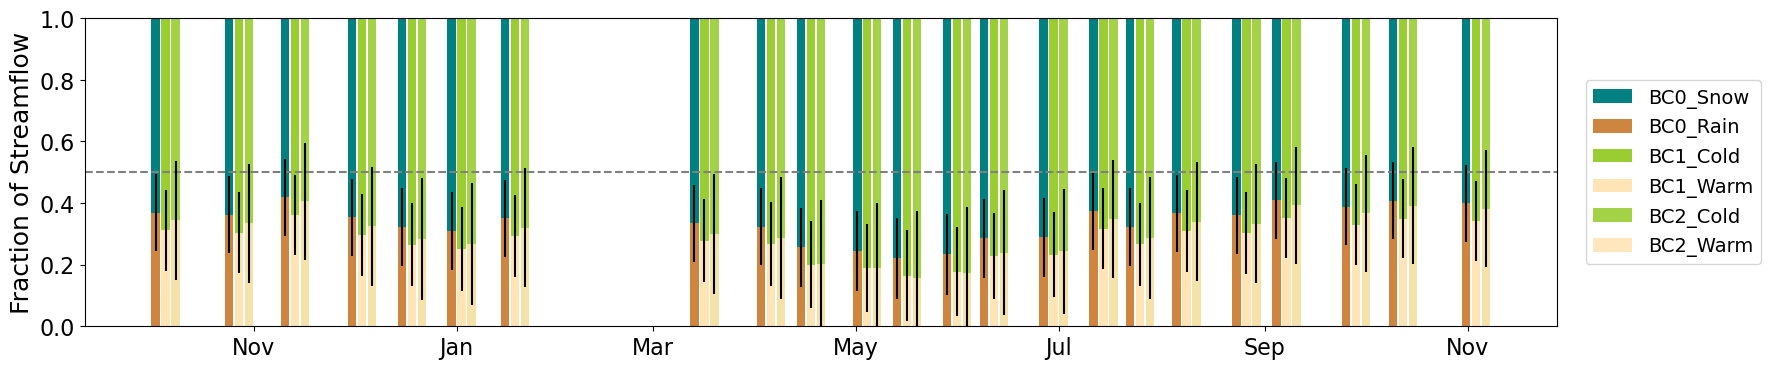

In [52]:
# BC1 - BC2
plt.rcParams["figure.figsize"] = [19, 4]
labels = df['Collection_Date']
width = 2.5

fig, ax = plt.subplots()
x = df['Collection_Date']
x = date2num(x)
# Add a horizontal line at 50%
plt.axhline(0.5, color='gray', linestyle='--')
# (+/-) to stagger bars Rain vs Snow
rects3 = ax.bar(x - 2.5, df.fM_Snow_BC + df.fM_Rain_BC, width, label='BC0_Snow', color= colors.BC_snow)
rects1 = ax.bar(x - 2.5, df.fM_Rain_BC, width, label='BC0_Rain', color= colors.BC_rain,yerr=df.sigma_BC0,ecolor='black')

#town creek moving avg
rects3 = ax.bar(x + 0.5, df.fM_Cold7_BC + df.fM_Warm7_BC, width, label='BC1_Cold', color= colors.BC_cold)
rects4 = ax.bar(x + 0.5, df.fM_Warm7_BC, width, label='BC1_Warm', color= colors.BC_warm,yerr=df.AM1_sigma_BC, ecolor='black')

#WRF Moving avg Site 4 only
rects7 = ax.bar(x + 3.5, df.fM_Cold7_BC_4 + df.fM_Warm7_BC_4, width, label='BC2_Cold', color= colors.BC_cold, alpha=0.9)
rects5 = ax.bar(x + 3.5, df.fM_Warm7_BC_4, width, label='BC2_Warm', color= colors.BC_warm,alpha=0.9, yerr=df.BC1_sigma_C_m, ecolor='black')

ax.set_ylabel('Fraction of Streamflow', fontsize=18)
plt.tick_params(axis='x', labelsize=16) 
plt.tick_params(axis='y', labelsize=16)
ax.legend(loc='right', bbox_to_anchor=(1.145, 0.5), fontsize=14)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.ylim(0,1.0);
#ax.set_title("Bannock Creek Partitioning of Precipitation into Streamflow", fontsize=20);

## BC3 - BC4 Combined

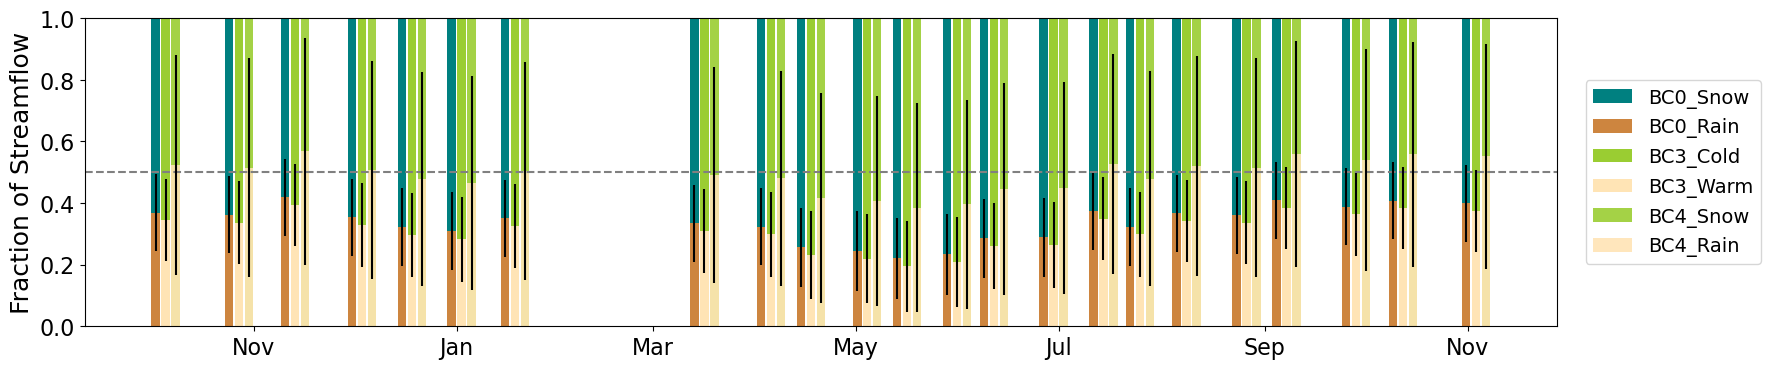

In [53]:
#combine all bar plots
plt.rcParams["figure.figsize"] = [19, 4]
labels = df['Collection_Date']
width = 2.5

fig, ax = plt.subplots()
x = df['Collection_Date']
x = date2num(x)
# Add a horizontal line at 50%
plt.axhline(0.5, color='gray', linestyle='--')
# (+/-) to stagger bars Rain vs Snow
rects3 = ax.bar(x - 2.5, df.fM_Snow_BC + df.fM_Rain_BC, width, label='BC0_Snow', color= colors.BC_snow)
rects1 = ax.bar(x - 2.5, df.fM_Rain_BC, width, label='BC0_Rain', color= colors.BC_rain,yerr=df.sigma_BC0,ecolor='black')

#BC WRF Moving avg Sites 2-8
rects7 = ax.bar(x + 0.5, df.fM__BC_moving_Cold7 + df.fM__BC_moving_Warm7, width, label='BC3_Cold', color= colors.BC_cold)
rects5 = ax.bar(x + 0.5, df.fM__BC_moving_Warm7, width, label='BC3_Warm', color= colors.BC_warm, yerr=df.BC3_sigma_C_m, ecolor='black')

#BC Elevation Weighted
rects7 = ax.bar(x + 3.5, df.fM__wghtd_BCE_Snow + df.fM__wghtd_BCE_Rain, width, label='BC4_Snow', color= colors.BC_cold,alpha=0.9)
rects5 = ax.bar(x + 3.5, df.fM__wghtd_BCE_Rain, width, label='BC4_Rain', color= colors.BC_warm,alpha=0.9,yerr=df.BC4_sigma_C_m,ecolor='black')

ax.set_ylabel('Fraction of Streamflow', fontsize=18)
plt.tick_params(axis='x', labelsize=16) 
plt.tick_params(axis='y', labelsize=16)
plt.ylim(0,1.0)
ax.legend(loc='right', bbox_to_anchor=(1.145, 0.5), fontsize=14)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b')); 

## BC5 - BC7 Combined

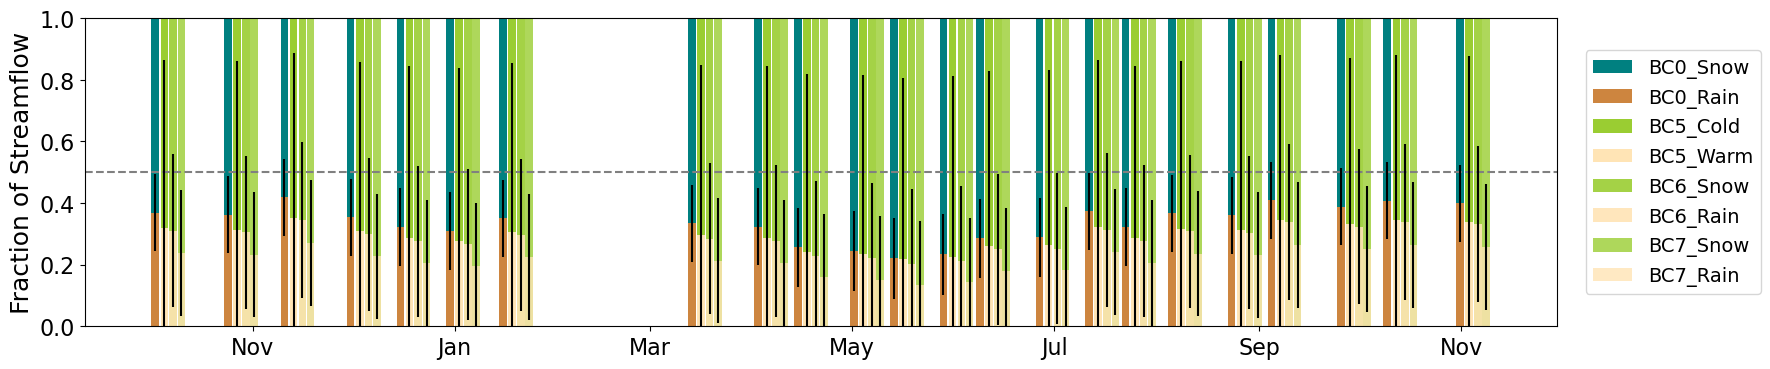

In [54]:
plt.rcParams["figure.figsize"] = [19, 4]
labels = df['Collection_Date']
width = 2.3

fig, ax = plt.subplots()
x = df['Collection_Date']
x = date2num(x)
# Add a horizontal line at 50%
plt.axhline(0.5, color='gray', linestyle='--')

# (+/-) to stagger bars Rain vs Snow
rects3 = ax.bar(x - 2.4, df.fM_Snow_BC + df.fM_Rain_BC, width, label='BC0_Snow', color= colors.BC_snow)
rects1 = ax.bar(x - 2.4, df.fM_Rain_BC, width, label='BC0_Rain', color= colors.BC_rain,yerr=df.sigma_BC0,ecolor='black')

#BC WRF Moving avg Sites 2-8
rects7 = ax.bar(x + 0.35, df.fM__Sine_Cold_BC + df.fM__Sine_Warm_BC, width, label='BC5_Cold', color= colors.BC_cold)
rects5 = ax.bar(x + 0.35, df.fM__Sine_Warm_BC, width, label='BC5_Warm', color= colors.BC_warm, yerr=df.BC5_sigma_C_m,ecolor='black')

#BC Elevation Weighted
rects2 = ax.bar(x + 3, df.fM__Sinemass_Cold_BC + df.fM__Sinemass_Warm_BC, width, label='BC6_Snow', color= colors.BC_cold,alpha=0.9)
rects4 = ax.bar(x + 3, df.fM__Sinemass_Warm_BC, width, label='BC6_Rain', color= colors.BC_warm,alpha=0.9,yerr=df.BC6_sigma_C_m,ecolor='black')

#BC Elevation Weighted
rects8 = ax.bar(x + 5.5, df.fM__Sinearea_Cold_BC + df.fM__Sinearea_Warm_BC, width, label='BC7_Snow', color= colors.BC_cold,alpha=0.8)
rects9 = ax.bar(x + 5.5, df.fM__Sinearea_Warm_BC, width, label='BC7_Rain', color= colors.BC_warm,alpha=0.8,yerr=df.BC7_sigma_C_m,ecolor='black')

ax.set_ylabel('Fraction of Streamflow', fontsize=18)
plt.tick_params(axis='x', labelsize=16) 
plt.tick_params(axis='y', labelsize=16)
ax.legend(loc='right', bbox_to_anchor=(1.145, 0.5), fontsize=14)
ax.xaxis_date() 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.ylim(0,1.0);

# MC Derived Difference Snow vs Cold

In [55]:
# Box plot percent difference: stand alone variable

# MC1: Snowtel 7 days in a row
# Same as MC2
#df['snotel'] = (df['fM_Cold7_MC'].sub(df['fM_Snow_MC'], fill_value=0)) * 100

# MC2: snotel moving average (7d)
df['snotel_avg_C'] = (df['fM_avg_Cold7_MC'].sub(df['fM_Snow_MC'], fill_value=0)) * 100
df['snotel_avg_W'] = (df['fM_avg_Warm7_MC'].sub(df['fM_Rain_MC'], fill_value=0)) * 100

# MC3: WRF 7d in a row site  1-10
df['wrf_C'] = (df['fM__wrf_Cold7_MC'].sub(df['fM_Snow_MC'], fill_value=0)) * 100
df['wrf_W'] = (df['fM__wrf_Warm7_MC'].sub(df['fM_Rain_MC'], fill_value=0)) * 100

# MC4: WRF 7d moving average site 1-10
df['wrf_avg_C'] = (df['fM__moving_Cold7_MC'].sub(df['fM_Snow_MC'], fill_value=0)) * 100
df['wrf_avg_W'] = (df['fM__moving_Warm7_MC'].sub(df['fM_Rain_MC'], fill_value=0)) * 100

# MC5: Elevation weighted average mass weighted isotopes
df['E_weight_S'] = (df['fM__wghtd_MCE_Snow'].sub(df['fM_Snow_MC'], fill_value=0)) * 100
df['E_weight_R'] = (df['fM__wghtd_MCE_Rain'].sub(df['fM_Rain_MC'], fill_value=0)) * 100

# MC6: trough peak
df['Sine_trough'] = (df['fM__Sine_Cold_MC'].sub(df['fM_Snow_MC'], fill_value=0)) * 100
df['Sine_peak'] = (df['fM__Sine_Warm_MC'].sub(df['fM_Rain_MC'], fill_value=0)) * 100
#delta_Sine_trough = -19.67
#delta_Sine_peak = -9.75

# MC7: mass weighted sine
#delta_Sine_Cold_Mass = -19.50
#delata_Sine_Warm_Mass = -10.31
df['Sine_C_m'] = (df['fM__Sine_Cold_MC_mass'].sub(df['fM_Snow_MC'], fill_value=0)) * 100
df['Sine_W_m'] = (df['fM__Sine_Warm_MC_mass'].sub(df['fM_Rain_MC'], fill_value=0)) * 100

# MC8: Area weighted sine
#d_Sine_Cold_AW = -19.85
#d_Sine_Warm_AW = -8.95
df['Sine_C_aw'] = (df['fM__Sine_Cold_MC_aw'].sub(df['fM_Snow_MC'], fill_value=0)) * 100
df['Sine_W_aw'] = (df['fM__Sine_Warm_MC_aw'].sub(df['fM_Rain_MC'], fill_value=0)) * 100

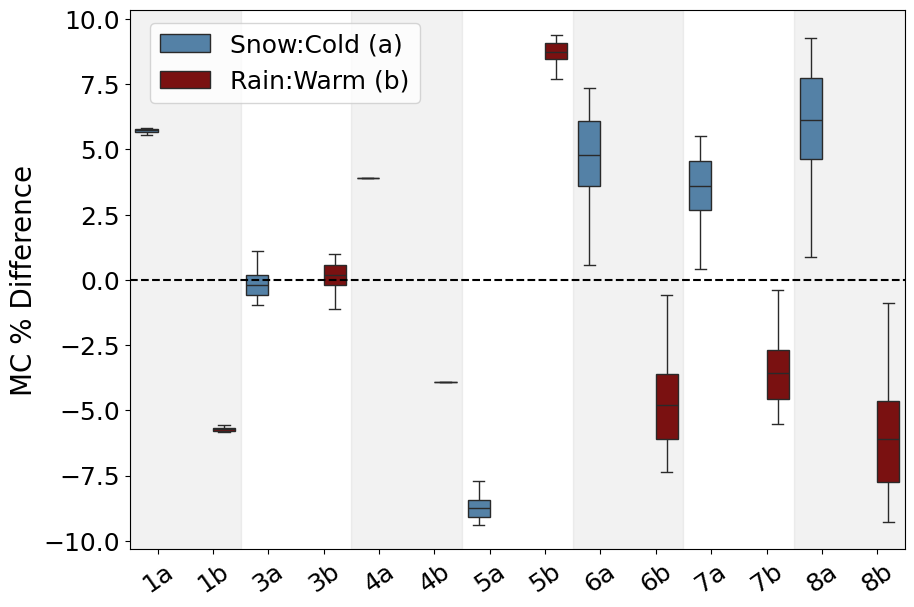

In [56]:
#Plotted MC Percent Differenct
columns_to_plot = [
    'snotel_avg_C', 'snotel_avg_W', 'wrf_C', 'wrf_W', 
    'wrf_avg_C', 'wrf_avg_W', 'E_weight_S', 'E_weight_R', 
    'Sine_trough', 'Sine_peak', 'Sine_C_m', 'Sine_W_m', 
    'Sine_C_aw', 'Sine_W_aw'
]

# Function to map index to new names
def map_index_to_name(index):
    # Skipping "2" is achieved by manipulating the base number calculation
    base_num = (index // 2) + 1
    if base_num >= 2:
        base_num += 1  # Increment to skip "2"
    suffix = 'a' if index % 2 == 0 else 'b'
    return f"{base_num}{suffix}"

# Create a mapping from old to new names using the custom logic
new_names = {old_name: map_index_to_name(i) for i, old_name in enumerate(columns_to_plot)}

# Rename the columns 
df_renamed = df.rename(columns=new_names)

# Melt the DataFrame to long format for seaborn plotting
df_melted = pd.melt(df_renamed, value_vars=list(new_names.values()))
df_melted['Group'] = df_melted['variable'].apply(lambda x: 'Snow:Cold (a)' if x.endswith('a') else 'Rain:Warm (b)')

# Create the boxplot with hue for 'Group' and specify the palette
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x='variable', y='value', hue='Group', data=df_melted, dodge=True, palette={'Snow:Cold (a)': 'steelblue', 'Rain:Warm (b)': 'darkred'})

# Shade every other group of variables
variables = df_melted['variable'].unique()
for i in range(0, len(variables), 4):  # Start at 0, step by 4 to shade every other pair
    ax.axvspan(i-0.5, i+1.5, color='gray', alpha=0.1)
#remove white space in margin
ax.set_xlim(-0.5, len(variables) - 0.5)

# Add a horizontal line at zero
plt.axhline(0, color='black', linestyle='--')
plt.legend(bbox_to_anchor=(0.01, 1), loc='upper left', fontsize=18)
plt.ylabel('MC % Difference', fontsize=20)
plt.xlabel('')
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.xticks(rotation=35);

In [57]:
print('5',df['E_weight_S'].describe()) # MC5 
print('6',df['Sine_trough'].describe()) # MC6 
print('7', df['Sine_C_m'].describe()) # MC7
print('8',df['Sine_W_aw'].describe()) # MC8 

5 count    25.000000
mean     -8.687011
std       0.445910
min      -9.392630
25%      -9.079807
50%      -8.752891
75%      -8.453703
max      -7.695282
Name: E_weight_S, dtype: float64
6 count    25.000000
mean      4.539178
std       1.782622
min       0.574530
25%       3.606480
50%       4.802548
75%       6.109464
max       7.360043
Name: Sine_trough, dtype: float64
7 count    25.000000
mean      3.387204
std       1.342011
min       0.402498
25%       2.685041
50%       3.585476
75%       4.569362
max       5.510835
Name: Sine_C_m, dtype: float64
8 count    25.000000
mean     -5.791141
std       2.205332
min      -9.280913
25%      -7.733787
50%      -6.116963
75%      -4.637274
max      -0.886363
Name: Sine_W_aw, dtype: float64


## BC Derived Difference Snow vs Cold

In [58]:
#% Difference fom Snow to Cold
# BC1 Town Creek Moving Average (7d) 
df['1a'] = (df['fM_Cold7_BC'].sub(df['fM_Snow_BC'], fill_value=0)) * 100
df['1b'] = (df['fM_Warm7_BC'].sub(df['fM_Rain_BC'], fill_value=0)) * 100

# BC2 WRF moving Average Site 4 only
df['2a'] = (df['fM_Cold7_BC_4'].sub(df['fM_Snow_BC'], fill_value=0)) * 100
df['2b'] = (df['fM_Warm7_BC_4'].sub(df['fM_Rain_BC'], fill_value=0)) * 100

# BC3  WRF moving Average - Sites 2-8 
df['3a'] = (df['fM__BC_moving_Cold7'].sub(df['fM_Snow_BC'], fill_value=0)) * 100
df['3b'] = (df['fM__BC_moving_Warm7'].sub(df['fM_Rain_BC'], fill_value=0)) * 100

# BC4 Elevation mass weighted 
df['4a'] = (df['fM__wghtd_BCE_Snow'].sub(df['fM_Snow_BC'], fill_value=0)) * 100
df['4b'] = (df['fM__wghtd_BCE_Rain'].sub(df['fM_Rain_BC'], fill_value=0)) * 100

# BC5 Seperate BC Sine 
df['5a'] = (df['fM__Sine_Cold_BC'].sub(df['fM_Snow_BC'], fill_value=0)) * 100
df['5b'] = (df['fM__Sine_Warm_BC'].sub(df['fM_Rain_BC'], fill_value=0)) * 100

# BC6 Seperate BC Sine Mass-Weighted 
df['6a'] = (df['fM__Sinemass_Cold_BC'].sub(df['fM_Snow_BC'], fill_value=0)) * 100
df['6b'] = (df['fM__Sinemass_Warm_BC'].sub(df['fM_Rain_BC'], fill_value=0)) * 100

# BC7 Seperate BC Sine Area-Weighted 
df['7a'] = (df['fM__Sinearea_Cold_BC'].sub(df['fM_Snow_BC'], fill_value=0)) * 100
df['7b'] = (df['fM__Sinearea_Warm_BC'].sub(df['fM_Rain_BC'], fill_value=0)) * 100

C:\Users\grena\AppData\Local\Temp\ipykernel_19356\3536306421.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['2a'] = (df['fM_Cold7_BC_4'].sub(df['fM_Snow_BC'], fill_value=0)) * 100
C:\Users\grena\AppData\Local\Temp\ipykernel_19356\3536306421.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['2b'] = (df['fM_Warm7_BC_4'].sub(df['fM_Rain_BC'], fill_value=0)) * 100
C:\Users\grena\AppData\Local\Temp\ipykernel_19356\3536306421.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling

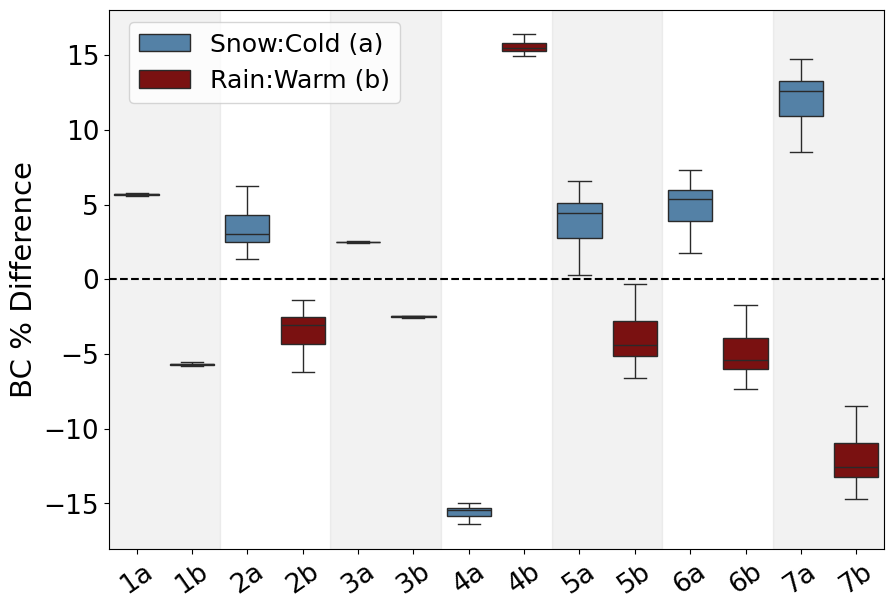

In [59]:
# Plotted BC Percent Difference
plt.figure(figsize=(10, 7))

# Create a list of the columns 
columns_to_plot = ['1a','1b','2a','2b','3a','3b','4a','4b','5a','5b','6a','6b','7a','7b']

# Melt the DataFrame to long format for seaborn
df_melted = pd.melt(df, value_vars=columns_to_plot)

# Add a new column to the melted DataFrame to classify each row as 'Snow: a' or 'Rain: b'
df_melted['Condition'] = df_melted['variable'].apply(lambda x: 'Snow:Cold (a)' if x.endswith('a') else 'Rain:Warm (b)')

# Create the boxplot with a hue based on the new column
sns.boxplot(x='variable', y='value', hue='Condition', data=df_melted, palette={'Snow:Cold (a)': 'steelblue', 'Rain:Warm (b)': 'darkred'})

# Add a horizontal line at zero
plt.axhline(0, color='black', linestyle='--')

# Shading alternate groups with vertical gray boxes
ax = plt.gca()  # Get current axis
variables = df_melted['variable'].unique()
for i in range(0, len(variables), 4):  # Shade every other pair
    ax.axvspan(i-0.5, i+1.5, color='gray', alpha=0.1)
#remove white space in margin
ax.set_xlim(-0.5, len(variables) - 0.5)

plt.xticks(rotation=35)
plt.ylabel('BC % Difference', fontsize=21)
plt.xlabel('')
plt.tick_params(axis='x', labelsize=19)
plt.tick_params(axis='y', labelsize=19)
plt.legend(bbox_to_anchor=(0.01, 1), loc='upper left', fontsize=18.1);

In [60]:
print('4a',df['4a'].describe()) #5 weight
print('4b',df['4b'].describe()) # 6

4a count    23.000000
mean    -15.583114
std       0.417313
min     -16.405144
25%     -15.844884
50%     -15.469693
75%     -15.317704
max     -14.978229
Name: 4a, dtype: float64
4b count    23.000000
mean     15.583114
std       0.417313
min      14.978229
25%      15.317704
50%      15.469693
75%      15.844884
max      16.405144
Name: 4b, dtype: float64


Stream flux

# Hydrograph Mores Creek  
Rain vs Snow

In [61]:
mc = pd.read_csv('../Data/18.MoresCreek_USGS_Gage.csv',parse_dates = [0])
mc['Mean_Discharge_m3_sec'] = mc['Mean_Discharge_ft3_sec'] * 0.0283168 #m3/s
mc.head(3)

,datetime,Mean_Discharge_ft3_sec,MC,BC,Mean_Discharge_m3_sec
0,2022-10-01,23.3,NaN,NaN,0.659781
1,2022-10-02,24.6,NaN,NaN,0.696593
2,2022-10-03,24.6,NaN,NaN,0.696593


In [62]:
df_merged = pd.merge(mc, df, left_on='datetime', right_on='Collection_Date', how='left')
df_merged['QMC_snow'] = (df_merged['fM_Snow_MC']) * df_merged['Mean_Discharge_m3_sec']
df_merged['QMC_rain'] = (df_merged['fM_Rain_MC']) * df_merged['Mean_Discharge_m3_sec']
df_merged.columns[9:40]

Index(['D_2H_StDev', 'D_18O', 'D_18O_StDev', 'Type', 'Site_no', 'D_18O_Rain',
       'D_18O_Snow', 'D_18O_MC', 'D_18O_BC', 'D_2H_Rain', 'D_2H_Snow',
       'D_18O_std_Rain', 'D_18O_std_Snow', 'D_18O_StDev_Precip',
       'D_18O_Precip', 'D_2H_Precip', 'fM_Rain_BC', 'fM_Snow_BC', 'fM_Rain_MC',
       'fM_Snow_MC', 'C_m', 'sigma_C_m', 'sigma_BC0', 'Cold7', 'Warm7',
       'fM_Warm7_MC', 'fM_Cold7_MC', 'AM1_sigma_C_m', 'Cold7_avg', 'Warm7_avg',
       'fM_avg_Warm7_MC'],
      dtype='object')

In [63]:
SE_rain = 0.202

#Seperate MC
df_merged['rain_plus'] = (df_merged['D_18O_MC'] - delta_snow) / ((delta_rain+0.202) - delta_snow)
df_merged['rain_minus'] = (df_merged['D_18O_MC'] - delta_snow) / ((delta_rain-0.202) - delta_snow)

df_merged['Q_rain_plus'] = (df_merged['rain_plus']) * df_merged['Mean_Discharge_m3_sec']
df_merged['Q_rain_minus'] = (df_merged['rain_minus']) * df_merged['Mean_Discharge_m3_sec']


SE_snow=0.159
df_merged['snow_plus'] = (df_merged['D_18O_MC'] - delta_snow+0.159) / ((delta_rain) - delta_snow+0.159)
snow_plus = 1 - df_merged['snow_plus']

df_merged['snow_minus'] = (df_merged['D_18O_MC'] - delta_snow-0.159) / ((delta_rain) - delta_snow-0.159)
snow_minus = 1 - df_merged['snow_minus']

df_merged['Q_snow_plus'] = snow_plus * df_merged['Mean_Discharge_m3_sec']
df_merged['Q_snow_minus'] = snow_minus * df_merged['Mean_Discharge_m3_sec']

C:\Users\grena\AppData\Local\Temp\ipykernel_19356\4185747015.py:45: UserWarning: Legend does not support handles for Axes instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  ax1.legend(legends1, labels1, loc='upper left', fontsize=0)


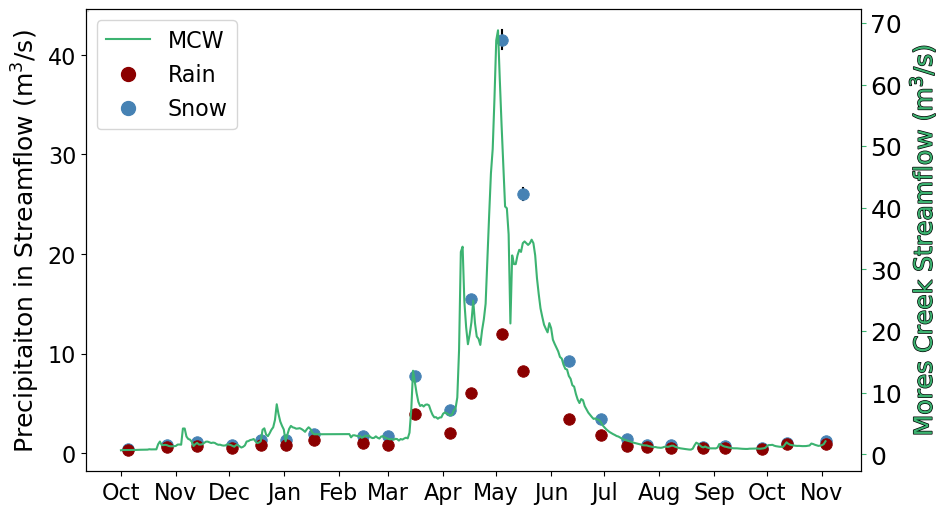

In [64]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Scatter plots for Rain and Snow
scatter_rain = sns.scatterplot(x=df_merged.datetime, y=df_merged.QMC_rain, 
                               color=colors.rain, label='Rain', s=68, ax=ax1,zorder=4,linestyle='None',edgecolor=colors.rain)
for i in range(len(df_merged)):
    ax1.plot([df_merged.datetime[i], 
              df_merged.datetime[i]], 
             [df_merged.Q_rain_minus[i],
              df_merged.Q_rain_plus[i]], 
             color='black', linestyle='-',linewidth=1.5,zorder=1)

scatter_snow = sns.scatterplot(x=df_merged.datetime, y=df_merged.QMC_snow, 
                               color=colors.snow, label='Snow', s=68, ax=ax1,linestyle='None',zorder=3,edgecolor=colors.snow)
for i in range(len(df_merged)):
    ax1.plot([df_merged.datetime[i], 
              df_merged.datetime[i]], 
             [df_merged.Q_snow_minus[i],
              df_merged.Q_snow_plus[i]], 
             color='black', linestyle='-', linewidth=1.5,zorder=2)
    
# Formatting the collection date as month and year on the x-axis
ax1.set_xlabel('')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax1.xaxis.set_major_locator(mdates.MonthLocator())
#plt.xticks(rotation=45)
ax1.set_ylabel(r'Precipitaiton in Streamflow ($\mathregular{m^{3}}$/s)', fontsize=18)
ax1.tick_params(axis='both', labelsize=16)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Line plot for Mores Creek with log scale
line_mc = sns.lineplot(x=df_merged.datetime,
                       y=df_merged.Mean_Discharge_m3_sec,color=colors.mcw, label='Mores Creek', ax=ax2)

# Set labels for the second y-axis
text = ax2.set_ylabel(r'Mores Creek Streamflow ($\mathregular{m^{3}}$/s)', fontsize=18, color=colors.mcw)
text.set_path_effects([patheffects.withStroke(linewidth=1, foreground='black')])
ax2.tick_params(axis='y', labelsize=18,color=colors.mcw)

# Combine legends for the first y-axis
legends1 = [scatter_rain, scatter_snow, line_mc]
labels1 = [legend.get_label() for legend in legends1]
ax1.legend(legends1, labels1, loc='upper left', fontsize=0)

# legend for the second y-axis
legend_elements = [
    mlines.Line2D([0], [0], color=colors.mcw, label='MCW', linestyle='-'),
    mlines.Line2D([0], [0], color='darkred', marker='o', label='Rain', markersize=10, linestyle='None'),
    mlines.Line2D([0], [0], color='steelblue', marker='o', label='Snow', markersize=10, linestyle='None')
]
# Place the custom legend in the upper right corner
ax2.legend(handles=legend_elements, loc='upper left', fontsize=16);

### S3 Equation: Std Error for unweighted


In [65]:
data = df['D_18O_Rain']
# Calculate the mean
mean_y = np.mean(data)
# Calculate the variance using Bessel's correction (ddof=1)
variance_y = np.var(data, ddof=1)
# Calculate the standard error of the mean
n = len(data)
#standard_error = np.sqrt(variance_y / n)
se_rain = np.sqrt(variance_y / n)
print("R Mean:", mean_y)
print("R Variance:", variance_y)
print("SEof the Mean Rain:", se_rain)
standard_deviation = np.sqrt(variance_y)
print("R Standard Deviation:", standard_deviation)

data = df['D_18O_Snow']
# Calculate the mean
mean_y = np.mean(data)
# Calculate the variance using Bessel's correction (ddof=1)
variance_y = np.var(data, ddof=1)
# Calculate the standard error of the mean
n = len(data)
#standard_error = np.sqrt(variance_y / n)
se_snow = np.sqrt(variance_y / n)
print("S Mean:", mean_y)
print("S Variance:", variance_y)
print("SEof the Mean Snow:", se_snow)
standard_deviation = np.sqrt(variance_y)
print("S Standard Deviation:", standard_deviation)

R Mean: -11.92301123076923
R Variance: 8.217066061607786
SEof the Mean Rain: 0.20219032044002683
R Standard Deviation: 2.866542527437503
S Mean: -19.115825106666666
S Variance: 5.0824460227250965
SEof the Mean Snow: 0.15901509710742895
S Standard Deviation: 2.254428092161091


## Fraction of streamflow - alternative figure

In [66]:
# Calculate partial derivatives
df_dstream = 1 / (delta_rain - delta_snow)
df_drain = (delta_MC.mean() - delta_snow) / (delta_rain - delta_snow)**2
df_dsnow = -(delta_MC - delta_rain) / (delta_rain - delta_snow)**2

# Error propagation
sigma_f_rain = np.sqrt((df_dstream * df.D_18O_StDev.mean())**2 + (df_drain * df.D_18O_std_Rain.mean())**2 + (df_dsnow * df.D_18O_std_Snow.mean())**2)

print("Standard Error of f_rain:", sigma_f_rain)

Standard Error of f_rain: 0           NaN
1      0.030399
2           NaN
3      0.030187
4           NaN
         ...   
196         NaN
197         NaN
198         NaN
199         NaN
200    0.030369
Name: D_18O_MC, Length: 201, dtype: float64


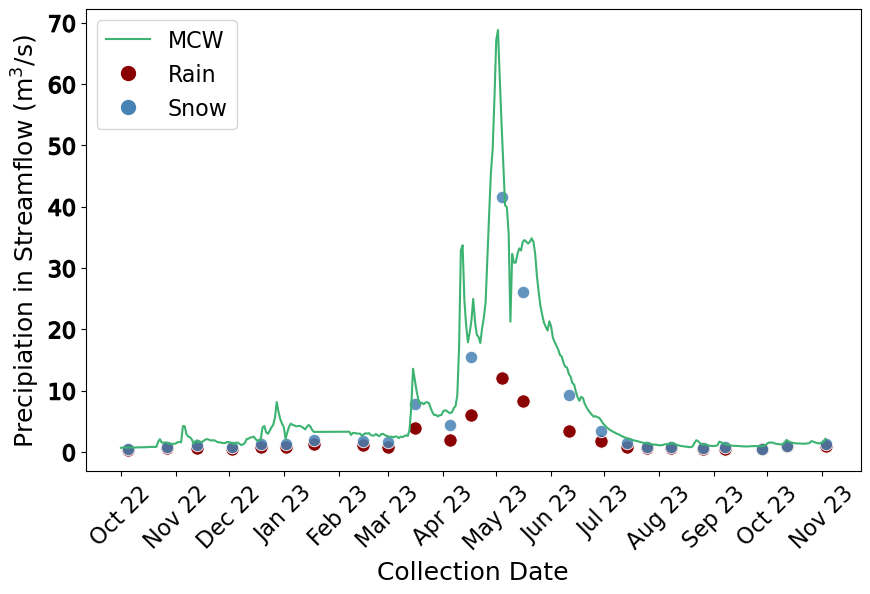

In [67]:
# add in alternative SE if desired
import colors
colors = {'rain': 'darkred', 'snow': 'steelblue', 'mcw': 'green'}

fig, ax1 = plt.subplots(figsize=(10, 6))

# Scatter plots for Rain and Snow directly on ax1
scatter_rain = sns.scatterplot(x=df_merged['Collection_Date'], y=df_merged.QMC_rain, 
                               color=colors['rain'], label='Rain', s=95, ax=ax1, linestyle='None')

scatter_snow = sns.scatterplot(x=df_merged['Collection_Date'], y=df_merged.QMC_snow, 
                               color=colors['snow'], label='Snow', s=80, alpha=0.85, ax=ax1, linestyle='None')

# Formatting the collection date as month and year on the x-axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
ax1.xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

# Set labels for the y-axis
ax1.set_xlabel('Collection Date', fontsize=18)
ax1.set_ylabel(r'Precipiation in Streamflow ($\mathregular{m^{3}}$/s)', fontsize=18)  # Updated label to be more general
ax1.tick_params(axis='both', labelsize=16)

# Line plot for Mores Creek with log scale
line_mc = sns.lineplot(x=df_merged.datetime, y=df_merged.Mean_Discharge_m3_sec, color='mediumseagreen', label='Mores Creek', ax=ax1)

# Place the custom legend in the upper right corner
ax1.legend(handles=legend_elements, loc='upper left', fontsize=16);

# Applying path effects to all y-axis labels to ensure visibility
for label in ax1.get_yticklabels():
    label.set_path_effects([patheffects.withStroke(linewidth=1, foreground='black')]);

## Days in each Season by method for results  
manually calculated each time period

In [68]:
#start_date = datetime.strptime('2023-05-01', '%Y-%m-%d')
#start_date = datetime.strptime('2022-10-05', '%Y-%m-%d')
start_date = datetime.strptime('2022-10-05', '%Y-%m-%d')
end_date = datetime.strptime('2023-02-06', '%Y-%m-%d')

#what is the last day of testing? 11/03/2023

# Calculate the difference in days
days_difference = (end_date - start_date).days

print(f'The number of days between the two dates is: {days_difference} days')

The number of days between the two dates is: 124 days


# Mores Creek Seasonal Percent Difference

In [69]:
df = df.copy() # to prevent fragmenting
df['MC_Sampling'] = df.loc[df['Type'] == 'MC', 'Collection_Date']

## Seasonal Streamflow Isotope Values for each AM

In [70]:
#okay now I need to mass weight per season... concat all new columns in df to prevent fragmenting 
#season fraction: sf
sf = pd.DataFrame({
#AM1:
#add streamflow cold and warm season
#event is the weigthed streamflow
    'delta_MC_Cold_am1': np.where((df['MC_Sampling'] >= '2022-11-03') &
                        (df['MC_Sampling'] < '2023-04-22'), df['D_18O_MC'], np.nan),
    
    'delta_MC_Warm_am1': np.where((df['MC_Sampling']  < '2022-11-03') |
                       (df['MC_Sampling']  >= '2023-04-22'),df['D_18O_MC'], np.nan),
#AM3 - Site 4 
# Winter Start = 2022-11-10      Summer Start = 2023-03-17
    'delta_MC_Cold_am3': np.where((df['MC_Sampling'] >= '2022-11-10') &
                        (df['MC_Sampling'] < '2023-03-17'), df['D_18O_MC'], np.nan),
    
    'delta_MC_Warm_am3': np.where((df['MC_Sampling']  < '2022-11-10') |
                        (df['MC_Sampling']  >= '2023-03-17'),df['D_18O_MC'], np.nan),

#AM4 - Site 4 
# Winter Start = 2022-11-10       Summer Start = 2023-03-17
    'delta_MC_Cold_am4': np.where((df['MC_Sampling'] >= '2022-11-11') &
                        (df['MC_Sampling'] < '2023-04-09'), df['D_18O_MC'], np.nan),

    'delta_MC_Warm_am4': np.where((df['MC_Sampling']  < '2022-11-11') |
                        (df['MC_Sampling']  >= '2023-04-09'),df['D_18O_MC'], np.nan),
#am5 - weighted
#delta_MCE_Snow = -19.53
#delta_MCE_Rain = -12.80
# Winter Start = 2022-12-18       Summer Start = 2023-05-16 
#am5c = -19.53
#am5w = -12.80
    'delta_MC_Cold_am5': np.where((df['MC_Sampling'] >= '2022-12-18') &
                        (df['MC_Sampling'] < '2023-05-16'), df['D_18O_MC'], np.nan),

    'delta_MC_Warm_am5': np.where((df['MC_Sampling']  < '2022-12-18') |
                        (df['MC_Sampling']  >= '2023-05-16'),df['D_18O_MC'], np.nan),
#AM6
    'delta_MC_Warm_am6': np.where((df['MC_Sampling'] >= '2023-02-27') &
                        (df['MC_Sampling'] < '2023-07-27'), df['D_18O_MC'], np.nan),

    'delta_MC_Cold_am6': np.where((df['MC_Sampling']  < '2023-02-27') |
                        (df['MC_Sampling']  >= '2023-07-27'),df['D_18O_MC'], np.nan)
})
df = pd.concat([df, sf], axis=1)

In [71]:
#AM1/2
#Seperate MC
#Warm Season Streamflow rain vs snow AM1
df['fM_AM1_SC_Warm'] = (df.delta_MC_Cold_am1 - delta_Cold7) / (delta_Warm7 - delta_Cold7)
df['fM_AM1_SC_Cold'] = 1 - df.fM_AM1_SC_Warm
#Cold season streamflow rain vs snow
df['fM_AM1_SW_Warm'] = (df.delta_MC_Warm_am1 - delta_Cold7) / (delta_Warm7 - delta_Cold7)
df['fM_AM1_SW_Cold'] = 1 - df.fM_AM1_SW_Warm
#Percent Difference
# snotel moving average (7d)
#AM1_StreamC_c
df['1/2a'] = (df['fM_AM1_SC_Cold'].sub(df['fM_Snow_MC'])) *100
#snotel moving average (7d)
#AM1_StreamC_w
df['1/2b'] = (df['fM_AM1_SC_Warm'].sub(df['fM_Rain_MC'])) * 100
#AM1_StreamW_c
# snotel moving average (7d)
df['1/2c'] = (df['fM_AM1_SW_Cold'].sub(df['fM_Snow_MC'])) * 100
#snotel moving average (7d)
#AM1_StreamC_w
df['1/2d'] = (df['fM_AM1_SW_Warm'].sub(df['fM_Rain_MC'])) * 100

# AM3 - Site 4 Seperate MC
df['fM_AM3_SC_Warm'] = (df.delta_MC_Cold_am3 - delta_wrf_Cold7) / (delta_wrf_Warm7 - delta_wrf_Cold7)
df['fM_AM3_SC_Cold'] = 1 - df.fM_AM3_SC_Warm

df['fM_AM3_SW_Warm'] = (df.delta_MC_Warm_am3 - delta_wrf_Cold7) / (delta_wrf_Warm7 - delta_wrf_Cold7)
df['fM_AM3_SW_Cold'] = 1 - df.fM_AM3_SW_Warm
#AM3_StreamC_c
df['3a '] = (df['fM_AM3_SC_Cold'].sub(df['fM_Snow_MC'])) *100
#snotel moving average (7d)
#AM3_StreamC_w
df['3b '] = (df['fM_AM3_SC_Warm'].sub(df['fM_Rain_MC'])) * 100
#AM3_StreamW_c
# snotel moving average (7d)
df['3c '] = (df['fM_AM3_SW_Cold'].sub(df['fM_Snow_MC'])) * 100
#snotel moving average (7d)
#AM3_StreamC_w
df['3d '] = (df['fM_AM3_SW_Warm'].sub(df['fM_Rain_MC'])) * 100

#AM4 Seperate MC
df['fM_AM4_SC_Warm'] = (df.delta_MC_Cold_am4 - delta_moving_Cold7) / (delta_moving_Warm7 - delta_moving_Cold7)
df['fM_AM4_SC_Cold'] = 1 - df.fM_AM4_SC_Warm
#Seperate MC
df['fM_AM4_SW_Warm'] = (df.delta_MC_Warm_am4 - delta_moving_Cold7) / (delta_moving_Warm7 - delta_moving_Cold7)
df['fM_AM4_SW_Cold'] = 1 - df.fM_AM4_SW_Warm
#AM4_StreamC_c
df['4a '] = (df['fM_AM4_SC_Cold'].sub(df['fM_Snow_MC'])) *100
#AM4_StreamC_w
df['4b '] = (df['fM_AM4_SC_Warm'].sub(df['fM_Rain_MC'])) * 100
#AM4_StreamW_c
df['4c '] = (df['fM_AM4_SW_Cold'].sub(df['fM_Snow_MC'])) * 100
#AM4_StreamC_w
df['4d '] = (df['fM_AM4_SW_Warm'].sub(df['fM_Rain_MC'])) * 100

#AM5 Cold Stream
df['fM_AM5_SC_Warm'] = (df.delta_MC_Cold_am5 - delta_MCE_Snow) / (delta_MCE_Rain - delta_MCE_Snow)
df['fM_AM5_SC_Cold'] = 1 - df.fM_AM5_SC_Warm
#warm stream
df['fM_AM5_SW_Warm'] = (df.delta_MC_Warm_am5 - delta_MCE_Snow) / (delta_MCE_Rain - delta_MCE_Snow)
df['fM_AM5_SW_Cold'] = 1 - df.fM_AM5_SW_Warm
#AM5_StreamC_c
df['5a '] = (df['fM_AM5_SC_Cold'].sub(df['fM_Snow_MC'])) *100
#AM5_StreamC_w
df['5b '] = (df['fM_AM5_SC_Warm'].sub(df['fM_Rain_MC'])) * 100
#AM5_StreamW_c
df['5c '] = (df['fM_AM5_SW_Cold'].sub(df['fM_Snow_MC'])) * 100
#AM5_StreamC_w
df['5d '] = (df['fM_AM5_SW_Warm'].sub(df['fM_Rain_MC'])) * 100

#Am6 Cold Stream
df['fM_AM6_SC_Warm'] = (df.delta_MC_Cold_am6 - delta_Sine_trough) / (delta_Sine_peak - delta_Sine_trough)
df['fM_AM6_SC_Cold'] = 1 - df['fM_AM6_SC_Warm']
#AM6 Warm Stream
df['fM_AM6_SW_Warm'] = (df.delta_MC_Warm_am6 - delta_Sine_trough) / (delta_Sine_peak - delta_Sine_trough)
df['fM_AM6_SW_Cold'] = 1 - df['fM_AM6_SW_Warm']
#AM6_StreamC_c
df['6a '] = (df['fM_AM6_SC_Cold'].sub(df['fM_Snow_MC'])) *100
#AM6_StreamC_w
df['6b '] = (df['fM_AM6_SC_Warm'].sub(df['fM_Rain_MC'])) * 100
#AM6_StreamW_c
df['6c '] = (df['fM_AM6_SW_Cold'].sub(df['fM_Snow_MC'])) * 100
#AM6_StreamC_w
df['6d '] = (df['fM_AM6_SW_Warm'].sub(df['fM_Rain_MC'])) * 100

#AM7 cold stream
df['fM_AM7_SC_Warm'] = (df.delta_MC_Cold_am6 - delta_Sine_Cold_Mass) / (delata_Sine_Warm_Mass - delta_Sine_Cold_Mass)
df['fM_AM7_SC_Cold'] = 1 - df['fM_AM7_SC_Warm']
# am7 warm stream
df['fM_AM7_SW_Warm'] = (df.delta_MC_Warm_am6 - delta_Sine_Cold_Mass) / (delata_Sine_Warm_Mass - delta_Sine_Cold_Mass)
df['fM_AM7_SW_Cold'] = 1 - df['fM_AM7_SW_Warm']
#AM7_StreamC_c
df['7a '] = (df['fM_AM7_SC_Cold'].sub(df['fM_Snow_MC'])) *100
#AM7_StreamC_w
df['7b '] = (df['fM_AM7_SC_Warm'].sub(df['fM_Rain_MC'])) * 100
#AM7_StreamW_c
df['7c '] = (df['fM_AM7_SW_Cold'].sub(df['fM_Snow_MC'])) * 100
#AM7_StreamC_w
df['7d '] = (df['fM_AM7_SW_Warm'].sub(df['fM_Rain_MC'])) * 100

#AM8 cold stream 
df['fM_AM8_SC_Warm'] = (df.delta_MC_Cold_am6 - d_Sine_Cold_AW) / (d_Sine_Warm_AW - d_Sine_Cold_AW)
df['fM_AM8_SC_Cold'] = 1 - df['fM_AM8_SC_Warm']
#am8 warm stream
df['fM_AM8_SW_Warm'] = (df.delta_MC_Warm_am6 - d_Sine_Cold_AW) / (d_Sine_Warm_AW - d_Sine_Cold_AW)
df['fM_AM8_SW_Cold'] = 1 - df['fM_AM8_SW_Warm']
#AM8_StreamC_c
df['8a '] = (df['fM_AM8_SC_Cold'].sub(df['fM_Snow_MC'])) *100
#AM8_StreamC_w
df['8b '] = (df['fM_AM8_SC_Warm'].sub(df['fM_Rain_MC'])) * 100
#AM8_StreamW_c
df['8c '] = (df['fM_AM8_SW_Cold'].sub(df['fM_Snow_MC'])) * 100
#AM8_StreamC_w
df['8d '] = (df['fM_AM8_SW_Warm'].sub(df['fM_Rain_MC'])) * 100

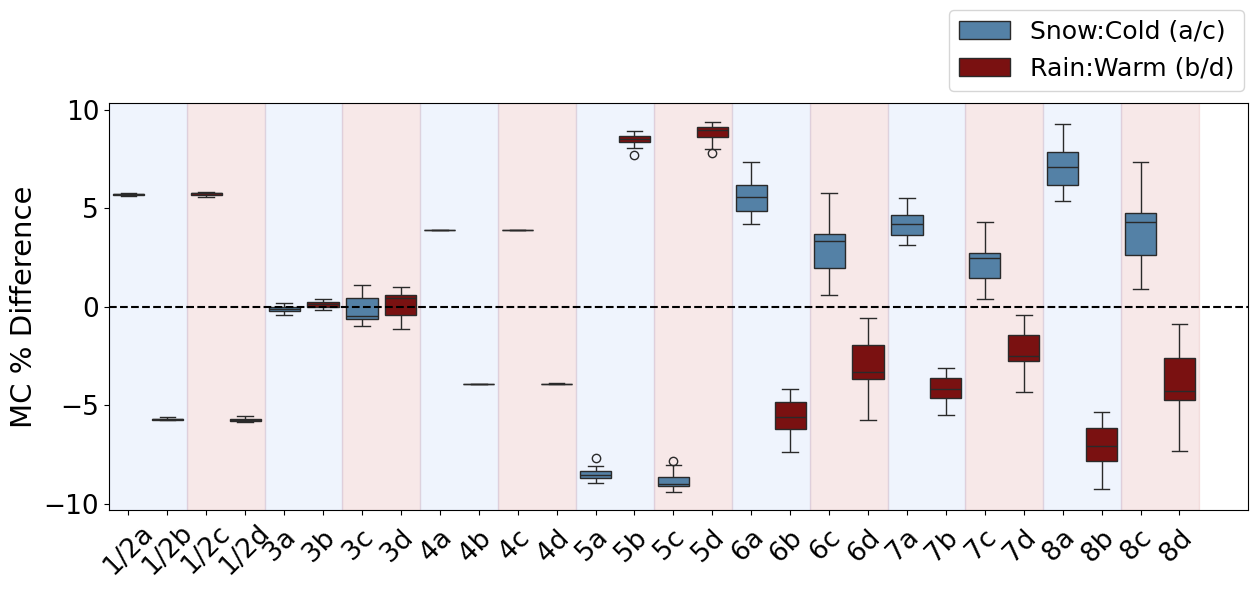

In [72]:
columns_to_plot = ['1/2a','1/2b','1/2c','1/2d',
                   '3a ', '3b ', '3c ', '3d ',
                   '4a ', '4b ', '4c ', '4d ',
                   '5a ', '5b ', '5c ', '5d ',
                   '6a ', '6b ', '6c ', '6d ',
                   '7a ', '7b ', '7c ', '7d ',
                   '8a ', '8b ', '8c ', '8d ']
                   

# Melt the DataFrame to long format for seaborn
df_melted = pd.melt(df, value_vars=columns_to_plot)

# Add a new column to the melted DataFrame to classify each row as 'Snow: a' or 'Rain: b'
df_melted['Condition'] = df_melted['variable'].apply(lambda x: 'Snow:Cold (a/c)' if x.endswith('a ') or x.endswith('c ') else 'Rain:Warm (b/d)')


# Create the boxplot with a hue based on the new column
plt.figure(figsize=(13, 6)) # length x width 
sns.boxplot(x='variable', y='value', hue='Condition', data=df_melted, palette={'Snow:Cold (a/c)': 'steelblue', 'Rain:Warm (b/d)': 'darkred'},hue_order=['Snow:Cold (a/c)', 'Rain:Warm (b/d)'])

# Add a horizontal line at zero
plt.axhline(0, color='black', linestyle='--')

# Shading alternate groups with vertical gray boxes
ax = plt.gca()  # Get current axis
variables = df_melted['variable'].unique()
#for i in range(0, len(variables), 4):  # Shade every other pair
#    ax.axvspan(i-0.5, i+1.5, color='gray', alpha=0.1)
# Shade every other pair starting with blue, then red, alternating
shading_colors = ['cornflowerblue', 'firebrick']  # List of colors to alternate
color_index = 0  # Start with the first color

for i in range(0, len(variables), 2):  # Loop through variables in steps of 4
    # Apply shading
    ax.axvspan(i-0.5, i+1.5, color=shading_colors[color_index], alpha=0.1)
    
    # Alternate color
    color_index = 1 - color_index  # Toggle between 0 and 1
    
plt.xticks(rotation=45)
plt.ylabel('MC % Difference', fontsize=21)
plt.xlabel('')
plt.tick_params(axis='x', labelsize=19)
plt.tick_params(axis='y', labelsize=19)
plt.legend(bbox_to_anchor=(0.727, 1), fontsize=18.1)
# Adjust plot limits and layout
ax.set_xlim(left=ax.get_xlim()[0]+1.4, right=ax.get_xlim()[1]-.15)  # Adjust right limit if needed
plt.tight_layout();

## Calculating Non- weighted Seasonal Stream Isotope Values

In [73]:
#AM1 #add streamflow cold and warm season
df['delta_MC_Cold'] = np.where((df['Collection_Date'] >= '2022-11-03') &
                        (df['Collection_Date'] < '2023-04-22'), df['D_18O_Precip'], np.nan)

df['delta_MC_Warm'] = np.where((df['Collection_Date']  < '2022-11-03') |
                        (df['Collection_Date']  >= '2023-04-22'),df['D_18O_Precip'], np.nan)

print('non weighted cold stream', df['delta_MC_Cold'].mean())
print('non weighted warm stream', df['delta_MC_Warm'].mean())

#stream cold vs warm
#Warm season streamflow
df['fM_Warm7_MCWarm'] = (df.delta_MC_Warm - delta_Cold7) / (delta_Warm7 - delta_Cold7)
df['fM_Cold7_MCWarm'] = 1 - df.fM_Warm7_MC

#Cold season streamflow
df['fM_Warm7_MCCold'] = (df.delta_MC_Cold - delta_Cold7) / (delta_Warm7 - delta_Cold7)
df['fM_Cold7_MCCold'] = 1 - df.fM_Warm7_MC



non weighted cold stream -18.72980804761905
non weighted warm stream -11.45475192753623


In [74]:
#AM2 Sream
df['Cold7_avg'] = np.where((df['MC_Sampling'] >= '2022-10-29') &
                        (df['MC_Sampling'] < '2023-05-01'), df['D_18O_Precip'], np.nan) 
df['Warm7_avg'] = np.where((df['MC_Sampling']  < '2022-10-29') |
                        (df['MC_Sampling']  >= '2023-05-01'),df['D_18O_Precip'], np.nan)

print('non weighted cold stream', df['Cold7_avg'].mean())
print('non weighted warm stream', df['Warm7_avg'].mean())

non weighted cold stream nan
non weighted warm stream nan


In [75]:
#AM3 
# AM3 - Site 4 
# Winter Start = 2022-11-10
# Summer Start = 2023-03-17

df['wrf_Cold7'] = np.where((df['MC_Sampling'] >= '2022-11-10') &
                        (df['MC_Sampling'] < '2023-03-17'), df['D_18O_MC'], np.nan) 
df['wrf_Warm7'] = np.where((df['MC_Sampling']  < '2022-11-10') |
                        (df['MC_Sampling']  >= '2023-03-17'),df['D_18O_MC'], np.nan)

print('non weighted cold stream', df['wrf_Cold7'].mean())
print('non weighted warm stream', df['wrf_Warm7'].mean())

non weighted cold stream -16.46600077777778
non weighted warm stream -16.466952125


In [76]:
#AM4 
# AM4 - Site 4 
# Winter Start = 2022-11-10
# Summer Start = 2023-03-17

df['wrf_Cold'] = np.where((df['MC_Sampling'] >= '2022-11-11') &
                        (df['MC_Sampling'] < '2023-04-09'), df['D_18O_MC'], np.nan) 
df['wrf_Warm'] = np.where((df['MC_Sampling']  < '2022-11-11') |
                        (df['MC_Sampling']  >= '2023-04-09'),df['D_18O_MC'], np.nan)

#AM4
df['wrf_Cold'].mean()
df['wrf_Warm'].mean()
print('non weighted cold stream', df['wrf_Cold'].mean())
print('non weighted warm stream', df['wrf_Warm'].mean())

non weighted cold stream -16.5036511
non weighted warm stream -16.441915333333334


# AM6 - 8

In [77]:
#Sine curve fitting - Site 4 @ 50% of watershed area 
# Winter Start = 2023-02-27
# Summer Start =  2023-07-27

df['sine_Warm'] = np.where((df['MC_Sampling'] >= '2023-02-27') &
                        (df['MC_Sampling'] < '2023-07-27'), df['D_18O_MC'], np.nan) 
df['sine_Cold'] = np.where((df['MC_Sampling']  < '2023-02-27') |
                        (df['MC_Sampling']  >= '2023-07-27'),df['D_18O_MC'], np.nan)

print('non weighted cold stream', df['sine_Cold'].mean())
print('non weighted warm stream', df['sine_Warm'].mean())

non weighted cold stream -16.1849296
non weighted warm stream -16.8891297


In [78]:
#Area Weighted Rain [-12.79868425259475]
#Area Weighted Snow [-19.525825786705543]
#All Volume weighted precip =  -16.0389

snow_mean = -19.22
rain_mean = -12.86
#Overall Weighted Average Isotope Value:
all_precip_mean = -16.12
# Determine the horizontal line position for Cold and Warm periods
y_cold = snow_mean
y_warm = rain_mean

# Define the date ranges for Cold and Warm periods
cold_start = pd.to_datetime('2022-11-03')
cold_end = pd.to_datetime('2023-04-22')
warm_start1 = pd.to_datetime('2022-10-05')
warm_end1 = pd.to_datetime('2022-11-02')
warm_start2 = pd.to_datetime('2023-04-22')
warm_end2 = pd.to_datetime('2023-11-13') 

In [79]:
#AM2
df['Cold7_avg'].mean()
df['Warm7_avg'].mean()

#AM3
df['wrf_Cold7'].mean()
df['wrf_Warm7'].mean()

#AM4
df['wrf_Cold'].mean()
df['wrf_Warm'].mean()

#AM6 - 8
df['sine_Cold'].mean()
df['sine_Warm'].mean()

np.float64(-16.8891297)

#### All AM definition and date ranges

In [80]:
# Plot the average of each end-member season; average precip for each collection date; and raw precip samples
# Group by 'Collection_Date' and calculate the mean of 'D_18O_Precip'
# Calculate the daily mean
daily_mean = df.groupby('Collection_Date')['D_18O_Precip'].mean().reset_index()
daily_mean.rename(columns={'D_18O_Precip': 'Daily_Mean'}, inplace=True)
all_precip_mean = df['D_18O_Precip'].mean() 

raw_mean = df['D_18O_Precip'].mean()
print(raw_mean)

#am1 def
#AM1 #add streamflow cold and warm season
df['delta_MC_Cold'] = np.where((df['Collection_Date'] >= '2022-11-03') &
                        (df['Collection_Date'] < '2023-04-22'), df['D_18O_Precip'], np.nan)

df['delta_MC_Warm'] = np.where((df['Collection_Date']  < '2022-11-03') |
                        (df['Collection_Date']  >= '2023-04-22'),df['D_18O_Precip'], np.nan)
am1_cold = df['delta_MC_Cold'].mean()
am1_warm = df['delta_MC_Warm'].mean()
# Define the date ranges for Cold and Warm periods
cold_start = pd.to_datetime('2022-11-03')
cold_end = pd.to_datetime('2023-04-21')
warm_start1 = pd.to_datetime('2022-10-01') 
warm_end1 = pd.to_datetime('2022-11-02')
warm_start2 = pd.to_datetime('2023-04-22')
warm_end2 = pd.to_datetime('2023-11-10') 
#yw: -18.603766426744926
#W Variance: 6.500293227798268
#neff =  67.81356604951021
#SE Cold of yw: 0.3096051546087878
#yw: -11.3329314647177
#W Variance: 6.812528697149028
#neff =  57.87062364093449
#SE warm of yw: 0.3431034547821298

#un weight warm se 0.11072927088621307
#act warm mean -11.45475192753623
#unweighted cold se 0.1103036208122069
#act cold mean -18.72980804761905

#am2 def
df['Cold7_avg'] = np.where((df['Collection_Date'] >= '2022-10-29') &
                        (df['Collection_Date'] < '2023-05-01'), df['D_18O_Precip'], np.nan) 
df['Warm7_avg'] = np.where((df['Collection_Date']  < '2022-10-29') |
                        (df['Collection_Date']  >= '2023-05-01'),df['D_18O_Precip'], np.nan)
am2c =  df['Cold7_avg'].mean()
am2w = df['Warm7_avg'].mean()
# Define the date ranges for Cold and Warm periods
cold_start_2 = pd.to_datetime('2022-10-29')
cold_end_2 = pd.to_datetime('2023-04-30')
warm_start1_2 = pd.to_datetime('2022-10-01') 
warm_end1_2 = pd.to_datetime('2022-10-28')
warm_start2_2 = pd.to_datetime('2023-05-01')
warm_end2_2 = pd.to_datetime('2023-11-10')

#yw: -18.603766426744926
#W Variance: 6.500293227798268
#neff =  67.81356604951021
#SE Cold of yw: 0.3096051546087878
#yw: -11.3329314647177
#W Variance: 6.812528697149028
#neff =  57.87062364093449
#SE warm of yw: 0.3431034547821298

#unweighted cold se 0.1103036208122069
#act cold mean -18.72980804761905
#un weight warm se 0.11072927088621307
#act warm mean -11.45475192753623

#am3def
# AM3 - Site 4 
# Winter Start = 2022-11-10
# Summer Start = 2023-03-17
df['wrf_Cold7'] = np.where((df['Collection_Date'] >= '2022-11-10') &
                        (df['Collection_Date'] < '2023-03-17'), df['D_18O_Precip'], np.nan) 
df['wrf_Warm7'] = np.where((df['Collection_Date']  < '2022-11-10') |
                        (df['Collection_Date']  >= '2023-03-17'),df['D_18O_Precip'], np.nan)
am3c = df['wrf_Cold7'].mean()
am3w = df['wrf_Warm7'].mean()
cold_start_3 = pd.to_datetime('2022-10-29')
cold_end_3 = pd.to_datetime('2023-04-30')
warm_start1_3 = pd.to_datetime('2022-10-01') 
warm_end1_3 = pd.to_datetime('2022-10-28')
warm_start2_3 = pd.to_datetime('2023-05-01')
warm_end2_3 = pd.to_datetime('2023-11-10') 
#yw: -18.591134649983776
#W Variance: 6.7214782839819724
#neff =  61.878123632680726
#SE Cold of yw: 0.32958226344948643
#yw: -11.923825335256058
#W Variance: 10.689981899786623
#neff =  63.6748070712081
#SE warm of yw: 0.4097365119892269

#unweighted cold se 0.10569075917849562
#act cold mean -18.64141324
#un weight warm se 0.16072768280867766
#act warm mean -12.379176487179487

#am4 def
# AM4 - Site 4 
# Winter Start = 2022-11-10
# Summer Start = 2023-03-17

df['wrf_Cold'] = np.where((df['Collection_Date'] >= '2022-11-11') &
                        (df['Collection_Date'] < '2023-04-09'), df['D_18O_Precip'], np.nan) 
df['wrf_Warm'] = np.where((df['Collection_Date']  < '2022-11-11') |
                        (df['Collection_Date']  >= '2023-04-09'),df['D_18O_Precip'], np.nan)
am4c = df['wrf_Cold'].mean()
am4w = df['wrf_Warm'].mean()
cold_start_4 = pd.to_datetime('2022-11-11')
cold_end_4 = pd.to_datetime('2023-04-08')
warm_start1_4 = pd.to_datetime('2022-10-01') 
warm_end1_4 = pd.to_datetime('2022-11-10')
warm_start2_4 = pd.to_datetime('2023-04-09')
warm_end2_4 = pd.to_datetime('2023-11-10') 
#yw: -18.603766426744926
#W Variance: 6.500293227798268
#neff =  67.81356604951021
#SE Cold of yw: 0.3096051546087878
#yw: -11.3329314647177
#W Variance: 6.812528697149028
#neff =  57.87062364093449
#SE warm of yw: 0.3431034547821298

#unweighted cold se 0.1103036208122069
#act cold mean -18.72980804761905
#un weight warm se 0.11072927088621307
#act warm mean -11.45475192753623

#am5
#delta_MCE_Snow = -19.53
#delta_MCE_Rain = -12.80
# Winter Start = 2022-12-18
# Summer Start = 2023-05-16 
am5c = -19.53
am5w = -12.80
cold_start_5 = pd.to_datetime('2022-12-18')
cold_end_5 = pd.to_datetime('2023-05-15')
warm_start1_5 = pd.to_datetime('2022-10-01') 
warm_end1_5 = pd.to_datetime('2022-12-17')
warm_start2_5 = pd.to_datetime('2023-05-16')
warm_end2_5 = pd.to_datetime('2023-11-10') 
# Rain Standard Error: 0.4541265233267076
# snow Standard Error: 0.3762087379412356

#am6 -8
#Sine curve fitting - Site 4 @ 50% of watershed area 
#summer start =  2023-05-29
#witner start =  2023-10-26
df['sine_Warm'] = np.where((df['Collection_Date'] >= '2023-05-29') &
                        (df['Collection_Date'] < '2023-10-26'), df['D_18O_Precip'], np.nan) 
df['sine_Cold'] = np.where((df['Collection_Date']  < '2023-05-29') |
                        (df['Collection_Date']  >= '2023-10-26') &
                        (df['Collection_Date'] < '2022-10-26'),
                           df['D_18O_Precip'], np.nan)

am6c =  -19.67 #df['sine_Cold'].mean()
am6w =  -9.75 #df['sine_Warm'].mean()
am7c =  -19.50
am7w = -10.25
am8c = -19.85
am8w = -8.95
cold_start_6 = pd.to_datetime('2022-10-01')
cold_end_6 = pd.to_datetime('2023-02-26')
warm_start1_6 = pd.to_datetime('2023-02-27') 
warm_end1_6 = pd.to_datetime('2023-07-26')
cold_start2_6 = pd.to_datetime('2023-07-27')
cold_end2_6 = pd.to_datetime('2023-11-10') 

-15.448900385620915


C:\Users\grena\AppData\Local\Temp\ipykernel_19356\1821867350.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='center', bbox_to_anchor=(1, 1),fontsize=0,frameon=False)
C:\Users\grena\AppData\Local\Temp\ipykernel_19356\1821867350.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='center', bbox_to_anchor=(1, 1),fontsize=0,frameon=False)


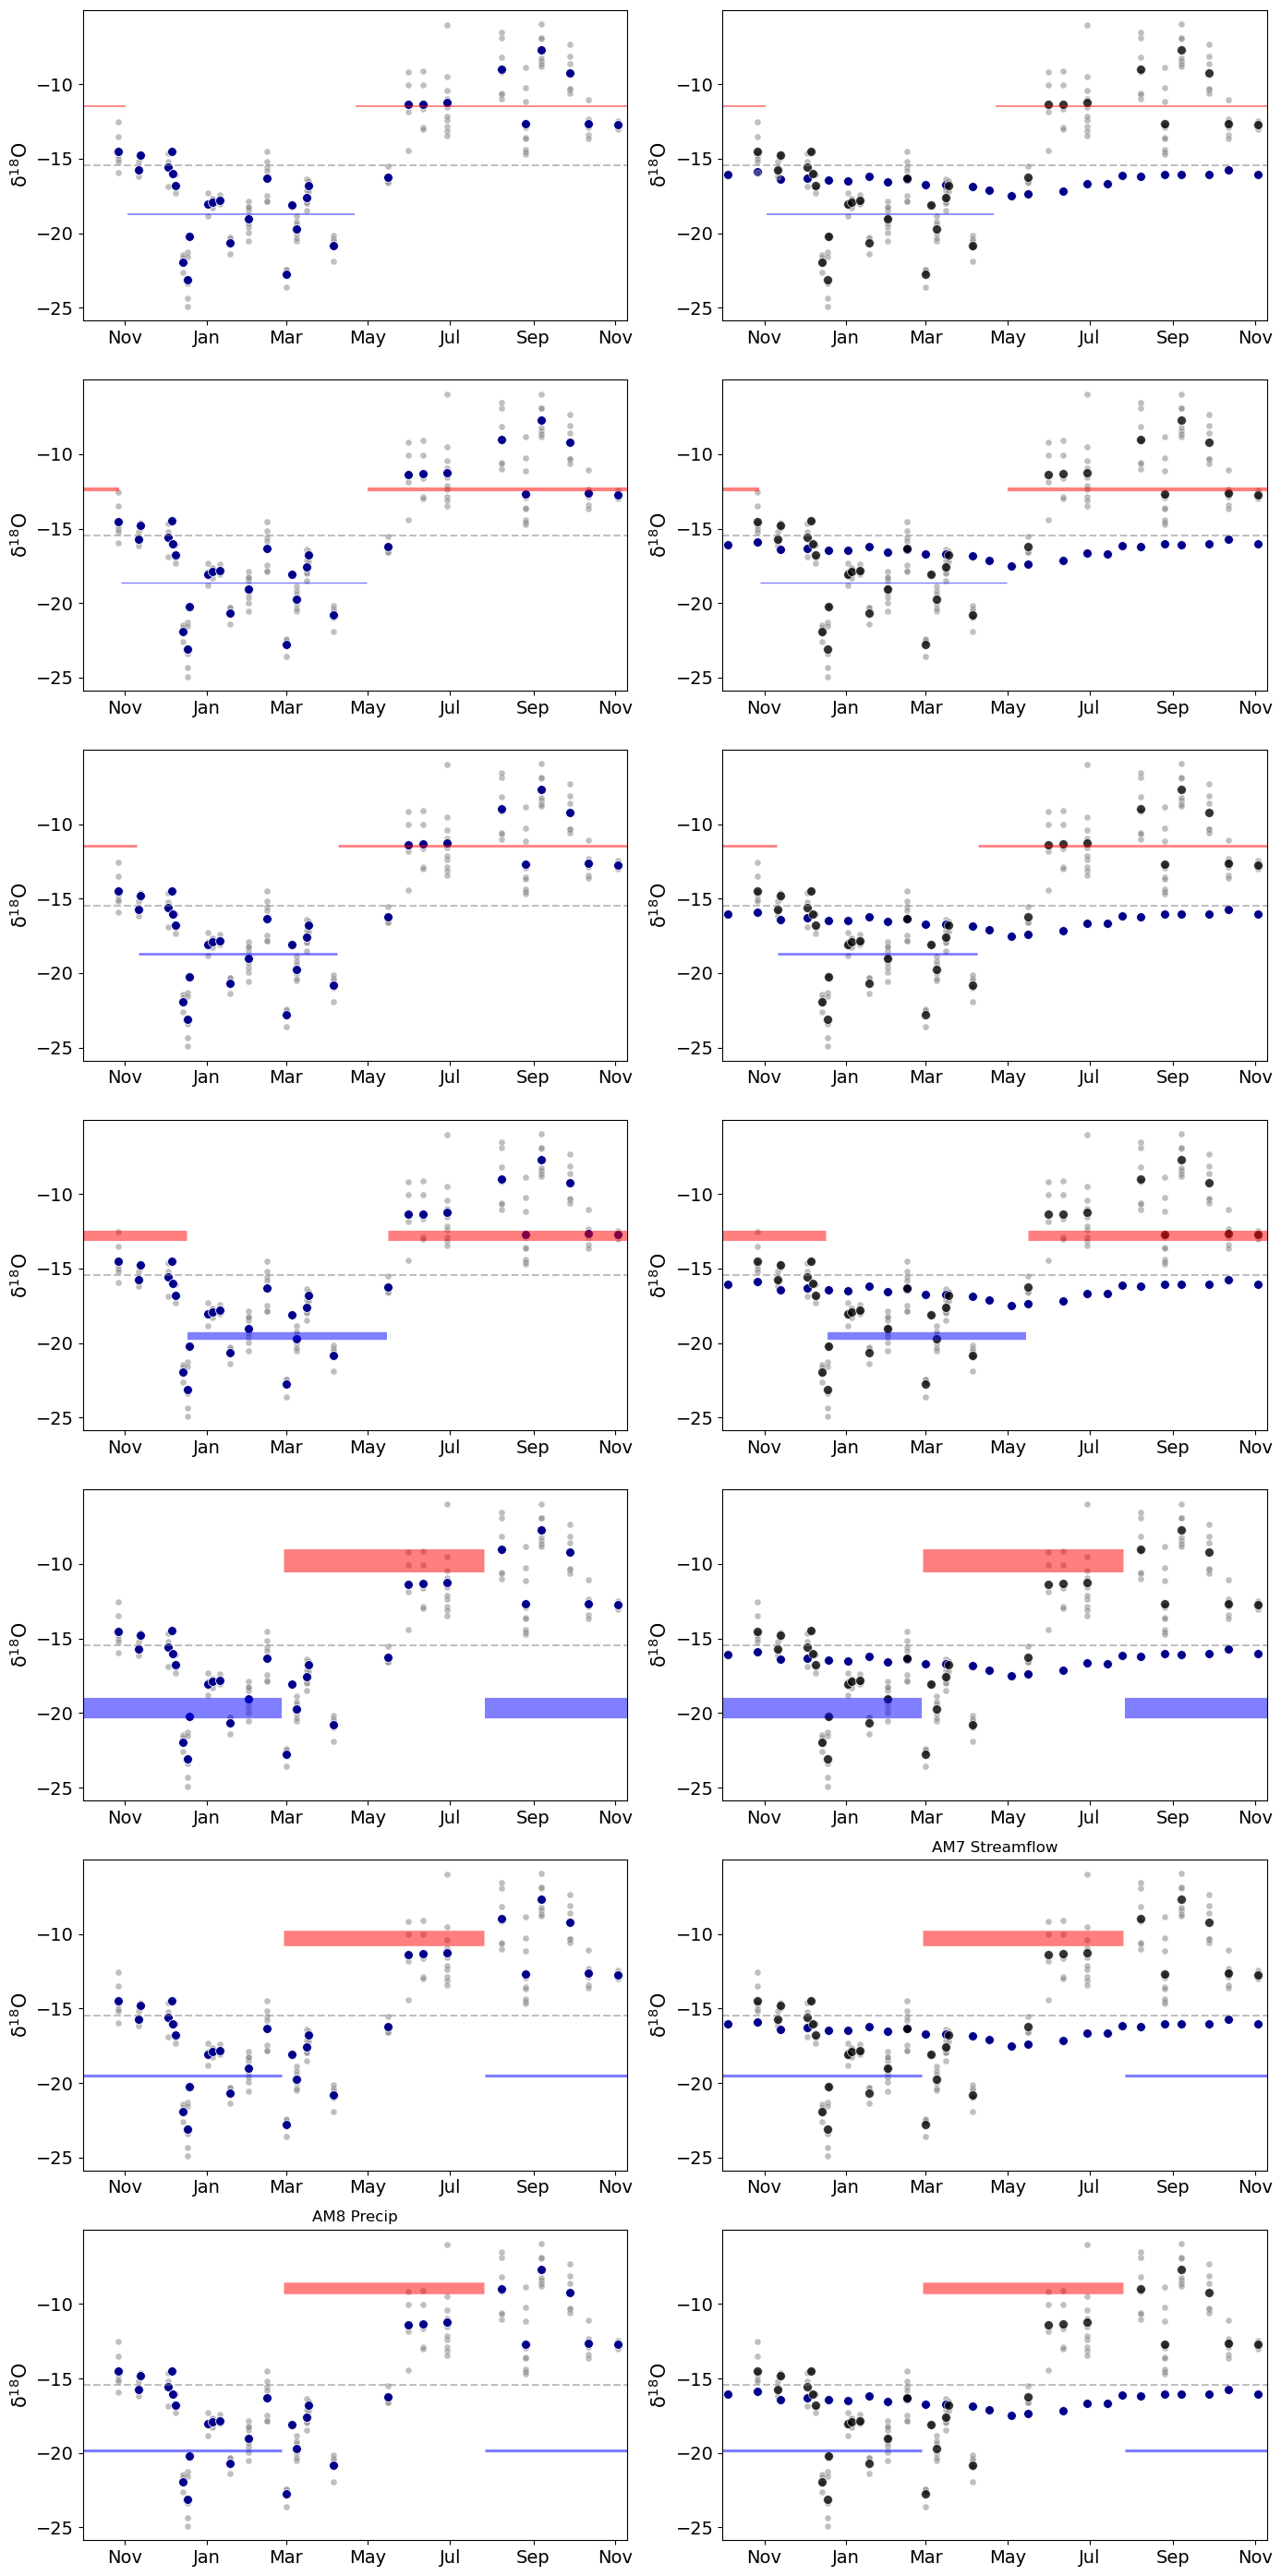

In [81]:
#Seasonal Streamflow Averages and Isotope Values
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 28))  
ax1, ax2, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16 = axes.flatten() 

# am1 precip data
#AM1 SE of the Mean Cold: 0.1103
#AM1 SE of the Mean Warm: 0.1107
ax1.hlines(am1_cold, cold_start, cold_end, colors='blue', linewidth=1.2, alpha=0.5)
ax1.hlines(am1_warm, warm_start1, warm_end1, colors='red', linewidth=1.3, alpha=0.5)
ax1.hlines(am1_warm, warm_start2, warm_end2, colors='red', linewidth=1.3, alpha=0.5)
ax1.axhline(all_precip_mean, color='gray', linestyle='--', alpha=0.5)
sns.scatterplot(ax=ax1, x='Collection_Date', y='D_18O_Precip', data=df,  alpha=0.5, s=25, color='gray')
sns.scatterplot(ax=ax1, x='Collection_Date', y='Daily_Mean', data=daily_mean, color='darkblue', s=50)
#ax1.text(x=1, y=0, s='hello', transform=ax.transAxes, ha="right", va="bottom", fontsize=14)
#ax1.set_title('AM1 - AM2')
ax1.legend(loc='center', bbox_to_anchor=(1, 1),fontsize=0,frameon=False)
#ax1.legend.set_visible(False)
ax1.set_xlim(warm_start1, warm_end2)

# am1 stream data
ax2.hlines(am1_cold, cold_start, cold_end, colors='blue', linewidth=1.2, alpha=0.5)
ax2.hlines(am1_warm, warm_start1, warm_end1, colors='red',linewidth=1.3, alpha=0.5)
ax2.hlines(am1_warm, warm_start2, warm_end2, colors='red', linewidth=1.3, alpha=0.5)
ax2.axhline(all_precip_mean, color='gray',  linestyle='--', alpha=0.5)
sns.scatterplot(ax=ax2, x='Collection_Date', y='D_18O_MC', data=df, s=50, color='darkblue')
sns.scatterplot(ax=ax2,x='Collection_Date', y='D_18O_Precip', data=df, alpha=0.5, s=25, color='gray')
sns.scatterplot(ax=ax2, x='Collection_Date', y='Daily_Mean', data=daily_mean, color='black', s=50, alpha=0.8)
#ax2.set_title('AM1- AM2 Streamflow')
ax2.legend(loc='center', bbox_to_anchor=(1, 1),fontsize=0,frameon=False)
#ax2.legend.set_visible(False)
ax2.set_xlim(warm_start1, warm_end2)


#am3 precipitation
#unweighted cold se 0.10569075917849562
#act cold mean -18.64141324
#un weight warm se 0.16072768280867766
#act warm mean -12.379176487179487
ax5.hlines(am3c, cold_start_3, cold_end_3, colors='blue', linewidth=1, alpha=0.5)
ax5.hlines(am3w, warm_start1_3, warm_end1_3, colors='red', linewidth=3, alpha=0.5)
ax5.hlines(am3w, warm_start2_3, warm_end2_3, colors='red', linewidth=3, alpha=0.5)
ax5.axhline(all_precip_mean, color='gray', linestyle='--', alpha=0.5)
sns.scatterplot(ax=ax5,x='Collection_Date', y='D_18O_Precip', data=df, alpha=0.5, s=25, color='gray')
sns.scatterplot(ax=ax5, x='Collection_Date', y='Daily_Mean', data=daily_mean, color='darkblue', s=50)
#ax5.set_title('AM3 Precip')
ax5.set_xlim(warm_start1_3, warm_end2_3)

ax6.hlines(am3c, cold_start_3, cold_end_3, colors='blue', linewidth=1, alpha=0.5)
ax6.hlines(am3w, warm_start1_3, warm_end1_3, colors='red', linewidth=3, alpha=0.5)
ax6.hlines(am3w, warm_start2_3, warm_end2_3, colors='red', linewidth=3, alpha=0.5)
#ax6.hlines(am3w+0.16, warm_start2_3, warm_end2_3, colors='red', linewidth=1, alpha=0.5)
#ax6.hlines(am3w-0.16, warm_start2_3, warm_end2_3, colors='red', linewidth=1, alpha=0.5)
ax6.axhline(all_precip_mean, color='gray', linestyle='--', alpha=0.5)
sns.scatterplot(ax=ax6,x='Collection_Date', y='D_18O_Precip', data=df, alpha=0.5, s=25, color='gray')
sns.scatterplot(ax=ax6, x='Collection_Date', y='D_18O_MC', data=df,s=50, color='darkblue')
sns.scatterplot(ax=ax6, x='Collection_Date', y='Daily_Mean', data=daily_mean, color='black', s=50, alpha=0.8)
#ax6.set_title('AM3 Streamflow')
ax6.set_xlim(warm_start1_3, warm_end2_3)

#am 4
#unweighted cold se 0.1103036208122069
#act cold mean -18.72980804761905
#un weight warm se 0.11072927088621307
#act warm mean -11.45475192753623
ax7.hlines(am4c, cold_start_4, cold_end_4, colors='blue', linewidth=2, alpha=0.5)
#ax7.hlines(am4c+0.11, cold_start_4, cold_end_4, colors='blue', linewidth=1, alpha=0.5)
#ax7.hlines(am4c-0.11, cold_start_4, cold_end_4, colors='blue', linewidth=1, alpha=0.5)

ax7.hlines(am4w, warm_start1_4, warm_end1_4, colors='red', linewidth=2, alpha=0.5)
#ax7.hlines(am4w+0.11, warm_start1_4, warm_end1_4, colors='red', linewidth=1, alpha=0.5)
#ax7.hlines(am4w-0.11, warm_start1_4, warm_end1_4, colors='red', linewidth=1, alpha=0.5)

ax7.hlines(am4w, warm_start2_4, warm_end2_4, colors='red', linewidth=2, alpha=0.5)
ax7.axhline(all_precip_mean, color='gray', linestyle='--', alpha=0.5)
sns.scatterplot(ax=ax7,x='Collection_Date', y='D_18O_Precip', data=df, alpha=0.5, s=25, color='gray')
sns.scatterplot(ax=ax7, x='Collection_Date', y='Daily_Mean', data=daily_mean, color='darkblue', s=50)
#ax7.set_title('AM4 Precip')
ax7.set_xlim(warm_start1_4, warm_end2_4)
#stream
ax8.hlines(am4c, cold_start_4, cold_end_4, colors='blue', linewidth=2, alpha=0.5)
ax8.hlines(am4w, warm_start1_4, warm_end1_4, colors='red', linewidth=2, alpha=0.5)
ax8.hlines(am4w, warm_start2_4, warm_end2_4, colors='red', linewidth=2, alpha=0.5)
ax8.axhline(all_precip_mean, color='gray', linestyle='--', alpha=0.5)
sns.scatterplot(ax=ax8,x='Collection_Date', y='D_18O_Precip', data=df, alpha=0.5, s=25, color='gray')
sns.scatterplot(ax=ax8, x='Collection_Date', y='D_18O_MC', data=df, s=50, color='darkblue')
sns.scatterplot(ax=ax8, x='Collection_Date', y='Daily_Mean', data=daily_mean, color='black', s=50, alpha=0.8)
ax8.set_xlabel('Collection Date')
#ax8.set_title('AM4 Streamflow')
ax8.set_xlim(warm_start1_4, warm_end2_4)

#am5
# Rain Standard Error: 0.4541265233267076
# snow Standard Error: 0.3762087379412356
ax9.hlines(am5c, cold_start_5, cold_end_5, colors='blue', linewidth=6, alpha=0.5)
ax9.hlines(am5w, warm_start1_5, warm_end1_5, colors='red', linewidth=8, alpha=0.5)
ax9.hlines(am5w, warm_start2_5, warm_end2_5, colors='red', linewidth=8, alpha=0.5)
ax9.axhline(all_precip_mean, color='gray', linestyle='--', alpha=0.5)
sns.scatterplot(ax=ax9,x='Collection_Date', y='D_18O_Precip', data=df, alpha=0.5, s=25, color='gray')
sns.scatterplot(ax=ax9, x='Collection_Date', y='Daily_Mean', data=daily_mean, color='darkblue', s=50)
#ax9.set_title('AM5 Precip')
ax9.set_xlim(warm_start1_5, warm_end2_5)

ax10.hlines(am5c, cold_start_5, cold_end_5, colors='blue', linewidth=6, alpha=0.5)
ax10.hlines(am5w, warm_start1_5, warm_end1_5, colors='red', linewidth=8, alpha=0.5)
ax10.hlines(am5w, warm_start2_5, warm_end2_5, colors='red', linewidth=8, alpha=0.5)
ax10.axhline(all_precip_mean, color='gray', linestyle='--', alpha=0.5)
sns.scatterplot(ax=ax10,x='Collection_Date', y='D_18O_Precip', data=df, alpha=0.5, s=25, color='gray')
sns.scatterplot(ax=ax10, x='Collection_Date', y='D_18O_MC', data=df, s=50, color='darkblue')
sns.scatterplot(ax=ax10, x='Collection_Date', y='Daily_Mean', data=daily_mean, color='black', s=50, alpha=0.8)
#ax10.set_title('AM5 Streamflow')
ax10.set_xlim(warm_start1_5, warm_end2_5)

#am6 
#need to redo 6-8 for SE height of average bar
#residual SE this is raw 
#SE_Peak = 0.75646
#SE_Trough =  0.7143
ax11.hlines(am6c, cold_start_6, cold_end_6, colors='blue', linewidth=16, alpha=0.5)
ax11.hlines(am6w, warm_start1_6, warm_end1_6, colors='red', linewidth=18, alpha=0.5)
ax11.hlines(am6c, cold_start2_6, cold_end2_6, colors='blue', linewidth=16, alpha=0.5)
ax11.axhline(all_precip_mean, color='gray', linestyle='--', alpha=0.5)
sns.scatterplot(ax=ax11,x='Collection_Date', y='D_18O_Precip', data=df, alpha=0.5, s=25, color='gray')
sns.scatterplot(ax=ax11, x='Collection_Date', y='Daily_Mean', data=daily_mean, color='darkblue', s=50)
#ax11.set_title('AM6 Precip')
ax11.set_xlim(cold_start_6, cold_end2_6)

ax12.hlines(am6c, cold_start_6, cold_end_6, colors='blue', linewidth=16, alpha=0.5)
ax12.hlines(am6w, warm_start1_6, warm_end1_6, colors='red', linewidth=18, alpha=0.5)
ax12.hlines(am6c, cold_start2_6, cold_end2_6, colors='blue', linewidth=16, alpha=0.5)
ax12.axhline(all_precip_mean, color='gray', linestyle='--', alpha=0.5)
sns.scatterplot(ax=ax12,x='Collection_Date', y='D_18O_Precip', data=df, alpha=0.5, s=25, color='gray')
sns.scatterplot(ax=ax12, x='Collection_Date', y='D_18O_MC', data=df, s=50, color='darkblue')
sns.scatterplot(ax=ax12, x='Collection_Date', y='Daily_Mean', data=daily_mean, color='black', s=50, alpha=0.8)
#ax12.set_title('AM6 Streamflow')
ax12.set_xlim(cold_start_6, cold_end2_6)

#am7
#std error 
#Warm SE Weighted Mean: 0.6914581731187124
#cold SE precip  = 0.2097 
ax13.hlines(am7c, cold_start_6, cold_end_6, colors='blue', linewidth=2.3, alpha=0.5)
ax13.hlines(am7w, warm_start1_6, warm_end1_6, colors='red', linewidth=12, alpha=0.5)
ax13.hlines(am7c, cold_start2_6, cold_end2_6, colors='blue', linewidth=2.3, alpha=0.5)
ax13.axhline(all_precip_mean, color='gray', linestyle='--', alpha=0.5)
sns.scatterplot(ax=ax13,x='Collection_Date', y='D_18O_Precip', data=df, alpha=0.5, s=25, color='gray')
sns.scatterplot(ax=ax13, x='Collection_Date', y='Daily_Mean', data=daily_mean, color='darkblue', s=50)
#ax13.set_title('AM7 Precip')
ax13.set_xlim(cold_start_6, cold_end2_6)

ax14.hlines(am7c, cold_start_6, cold_end_6, colors='blue', linewidth=2.3, alpha=0.5)
ax14.hlines(am7w, warm_start1_6, warm_end1_6, colors='red', linewidth=12, alpha=0.5)
ax14.hlines(am7c, cold_start2_6, cold_end2_6, colors='blue', linewidth=2.3, alpha=0.5)
ax14.axhline(all_precip_mean, color='gray', linestyle='--', alpha=0.5)
sns.scatterplot(ax=ax14,x='Collection_Date', y='D_18O_Precip', data=df, alpha=0.5, s=25, color='gray')
sns.scatterplot(ax=ax14, x='Collection_Date', y='D_18O_MC', data=df, s=50, color='darkblue')
sns.scatterplot(ax=ax14, x='Collection_Date', y='Daily_Mean', data=daily_mean, color='black', s=50, alpha=0.8)
ax14.set_title('AM7 Streamflow')
ax14.set_xlim(cold_start_6, cold_end2_6)

#am8
# warm precip SE = 0.4866 
# cold precip SE = 0.2223 
ax15.hlines(am8c, cold_start_6, cold_end_6, colors='blue', linewidth=2.3, alpha=0.5)
ax15.hlines(am8w, warm_start1_6, warm_end1_6, colors='red', linewidth=9, alpha=0.5)
ax15.hlines(am8c, cold_start2_6, cold_end2_6, colors='blue', linewidth=2.3, alpha=0.5)
ax15.axhline(all_precip_mean, color='gray', linestyle='--', alpha=0.5)
sns.scatterplot(ax=ax15,x='Collection_Date', y='D_18O_Precip', data=df, alpha=0.5, s=25, color='gray')
sns.scatterplot(ax=ax15, x='Collection_Date', y='Daily_Mean', data=daily_mean, color='darkblue', s=50)
ax15.set_title('AM8 Precip')
ax15.set_xlim(cold_start_6, cold_end2_6)

ax16.hlines(am8c, cold_start_6, cold_end_6, colors='blue', linewidth=2.3, alpha=0.5)
ax16.hlines(am8w, warm_start1_6, warm_end1_6, colors='red', linewidth=9, alpha=0.5)
ax16.hlines(am8c, cold_start2_6, cold_end2_6, colors='blue', linewidth=2.3, alpha=0.5)
ax16.axhline(all_precip_mean, color='gray', linestyle='--', alpha=0.5)
sns.scatterplot(ax=ax16,x='Collection_Date', y='D_18O_Precip', data=df, alpha=0.5, s=25, color='gray')
sns.scatterplot(ax=ax16, x='Collection_Date', y='D_18O_MC', data=df, s=50, color='darkblue')
sns.scatterplot(ax=ax16, x='Collection_Date', y='Daily_Mean', data=daily_mean, color='black', s=50, alpha=0.8)
#ax16.set_title('AM8 Streamflow')
ax16.set_xlim(cold_start_6, cold_end2_6)

# Iterate over each axis and set the x-axis tick labels to month-year format
for ax in axes.flatten():
    ax.tick_params(axis='both', labelsize=14)
    # Rotate and set font size for x-axis tick labels
for ax in axes.flatten():
    ax.set_ylabel(r'$\mathregular{\delta^{18}O}$', fontsize=15)
    ax.set_xlabel('') # Sample Dates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# Adjust layout to prevent overlap
plt.tight_layout()

In [82]:
#Over under representation of precip in Q based on AM1/AM2 average % (over-under in Kirchner & Allen)
#Am5
# Define the fractions of total precipitation for summer and winter
fraction_summer_precip = 0.46  # Example value (50% of total precipitation in summer)
fraction_winter_precip = 0.54  # Example value (50% of total precipitation in winter)

# Define the fractional representation of precipitation in streamflow
fraction_summer_streamflow = 0.38  # Example value for summer streamflow
fraction_winter_streamflow = 0.64  # Example value for winter streamflow

# Calculate the over- or under-representation for each season
summer_over_under_representation = (fraction_summer_streamflow - fraction_summer_precip) / fraction_summer_precip * 100
winter_over_under_representation = (fraction_winter_streamflow - fraction_winter_precip) / fraction_winter_precip * 100

# Print the results
print(f"Summer precipitation is {'over' if summer_over_under_representation > 0 else 'under'}-represented by {abs(summer_over_under_representation):.2f}% in streamflow.")
print(f"Winter precipitation is {'over' if winter_over_under_representation > 0 else 'under'}-represented by {abs(winter_over_under_representation):.2f}% in streamflow.")

# Example output for the over- or under-representation
fraction_summer_streamflow_winter = 0.62  # Example value for summer streamflow in winter
fraction_winter_streamflow_summer = 0.36  # Example value for winter streamflow in summer

summer_over_under_representation_winter = (fraction_summer_streamflow_winter - fraction_summer_precip) / fraction_summer_precip * 100
winter_over_under_representation_summer = (fraction_winter_streamflow_summer - fraction_winter_precip) / fraction_winter_precip * 100

print(f"Summer precipitation is {'over' if summer_over_under_representation_winter > 0 else 'under'}-represented by {abs(summer_over_under_representation_winter):.2f}% in winter streamflow.")
print(f"Winter precipitation is {'over' if winter_over_under_representation_summer > 0 else 'under'}-represented by {abs(winter_over_under_representation_summer):.2f}% in summer streamflow.")

Summer precipitation is under-represented by 17.39% in streamflow.
Winter precipitation is over-represented by 18.52% in streamflow.
Summer precipitation is over-represented by 34.78% in winter streamflow.
Winter precipitation is under-represented by 33.33% in summer streamflow.


In [83]:
#Base
df['base_Cold'] = np.where((df['MC_Sampling'] >= '2022-12-18') &
                     (df['MC_Sampling'] < '2023-05-16'), df['D_18O_MC'], np.nan) 
df['base_Warm'] = np.where((df['MC_Sampling']  < '2022-12-18') |
                       (df['MC_Sampling']  >= '2023-05-16'),df['D_18O_MC'], np.nan)


base_MC_Cold = df['base_Cold']
base_MC_Warm = df['base_Warm']
delta_rain = df['D_18O_Rain'].mean()
delta_snow = df['D_18O_Snow'].mean()
#Warm Season Streamflow
df['fM__base_Qw_pw'] = (base_MC_Warm - delta_snow) / (delta_rain - delta_snow)
df['fM__base_Qw_pc'] = 1 - df['fM__base_Qw_pw']
#Cold Season Streamflow
df['fM__base_Qc_pw'] = (base_MC_Cold - delta_snow) / (delta_rain - delta_snow)
df['fM__base_Qc_pc'] = 1 - df['fM__base_Qc_pw']


In [84]:
## ==== VARIANCE COLD VS WARM STREAM & PRECIP =====

method_columns = [
    'fM__base_Qw_pw','fM__base_Qw_pc','fM__base_Qc_pw','fM__base_Qc_pc',
    'fM_AM1_SC_Warm', 'fM_AM1_SC_Cold', 'fM_AM1_SW_Warm', 'fM_AM1_SW_Cold',
    'fM_AM3_SC_Warm','fM_AM3_SC_Cold','fM_AM3_SW_Warm','fM_AM3_SW_Cold',
    'fM_AM4_SC_Warm','fM_AM4_SC_Cold','fM_AM4_SW_Warm','fM_AM4_SW_Cold',
    'fM_AM5_SC_Warm','fM_AM5_SC_Cold','fM_AM5_SW_Warm','fM_AM5_SW_Cold',
    'fM_AM6_SC_Warm','fM_AM6_SC_Cold','fM_AM6_SW_Warm','fM_AM6_SW_Cold',
    'fM_AM7_SC_Warm','fM_AM7_SC_Cold','fM_AM7_SW_Warm','fM_AM7_SW_Cold',
    'fM_AM8_SC_Warm','fM_AM8_SC_Cold','fM_AM8_SW_Warm','fM_AM8_SW_Cold',
]

for method in method_columns:
    vals = df[method].dropna()
    if len(vals) > 1:
        max_val = vals.max()
        min_val = vals.min()
        mean_val = vals.mean()

        percent_range = ((max_val - min_val) / mean_val) * 100
        print(f"% range {method}: {percent_range:.2f}%")
    else:
        print(f"Not enough data to compute % range for {method}")

% range fM__base_Qw_pw: 58.95%
% range fM__base_Qw_pc: 37.61%
% range fM__base_Qc_pw: 53.65%
% range fM__base_Qc_pc: 27.22%
% range fM_AM1_SC_Warm: 41.41%
% range fM_AM1_SC_Cold: 17.62%
% range fM_AM1_SW_Warm: 76.02%
% range fM_AM1_SW_Cold: 35.94%
% range fM_AM3_SC_Warm: 21.00%
% range fM_AM3_SC_Cold: 12.31%
% range fM_AM3_SW_Warm: 72.51%
% range fM_AM3_SW_Cold: 42.46%
% range fM_AM4_SC_Warm: 27.32%
% range fM_AM4_SC_Cold: 13.10%
% range fM_AM4_SW_Warm: 74.13%
% range fM_AM4_SW_Cold: 36.95%
% range fM_AM5_SC_Warm: 45.81%
% range fM_AM5_SC_Cold: 33.35%
% range fM_AM5_SW_Warm: 51.36%
% range fM_AM5_SW_Cold: 46.99%
% range fM_AM6_SC_Warm: 23.82%
% range fM_AM6_SC_Cold: 12.90%
% range fM_AM6_SW_Warm: 48.96%
% range fM_AM6_SW_Cold: 19.07%
% range fM_AM7_SC_Warm: 25.04%
% range fM_AM7_SC_Cold: 14.42%
% range fM_AM7_SW_Warm: 52.15%
% range fM_AM7_SW_Cold: 21.08%
% range fM_AM8_SC_Warm: 22.65%
% range fM_AM8_SC_Cold: 11.47%
% range fM_AM8_SW_Warm: 45.99%
% range fM_AM8_SW_Cold: 17.15%
